<a href="https://colab.research.google.com/github/Vasily95/final_project/blob/Vasily95-patch-1/%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BE%D0%B1%D1%8A%D1%8F%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D0%B9_%D0%BE_%D0%BF%D1%80%D0%BE%D0%B4%D0%B0%D0%B6%D0%B5_%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B8%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Рассчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Рассчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Рассчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 
Нам необходимо выявить параметры, которые позволят построить автоматизированную систему.

## Изучение данных из файла

In [96]:
import pandas as pd
data_hom=pd.read_csv('/content/real_estate_data (1).csv',sep='\t',decimal='.')
data_hom.head(20)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [97]:
data_hom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

Выводим первые 20 строк таблицы на экран и информацию о таблице. Для того, чтобы таблица корректно отображалась, использовал разделитель колонок параметр 'sep\t', а для дробей параметр 'decimal'. В таблице мы видим, что во многих столбцах('balcony', 'cityCenters_nearest', 'parks_around3000', 'ponds_nearest', days_exposition) есть пропуски, которые необходимо будет заполнить. Кроме того, будет необходимо изменить тип данных в перечисленных столбцах с float на int. Столбец 'is_apartment', где очень много пропусков будет необходимо понять их природу и поменять тип данных на булев тип.

In [98]:
report = data_hom.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / data_hom.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
is_apartment,20924,0.88
parks_nearest,15620,0.66
ponds_nearest,14589,0.62
balcony,11519,0.49
ceiling_height,9195,0.39
airports_nearest,5542,0.23
cityCenters_nearest,5519,0.23
ponds_around3000,5518,0.23
parks_around3000,5518,0.23
days_exposition,3181,0.13


## Предобработка данных

In [99]:
data_hom[data_hom['balcony'].isnull()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
10,5,5050000.0,39.60,2017-11-16T00:00:00,1,2.67,12.0,20.30,3,NaN,False,False,8.50,NaN,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
16,11,6700000.0,82.00,2017-11-23T00:00:00,3,3.05,5.0,55.60,1,NaN,False,False,9.00,NaN,Санкт-Петербург,22108.0,10698.0,3.0,420.0,0.0,NaN,397.0
19,16,14200000.0,121.00,2019-01-09T00:00:00,3,2.75,16.0,76.00,8,NaN,False,False,12.00,NaN,Санкт-Петербург,38900.0,12843.0,0.0,NaN,0.0,NaN,97.0
23,11,2950000.0,32.00,2016-10-29T00:00:00,1,2.60,9.0,17.70,9,NaN,False,False,6.10,NaN,Санкт-Петербург,15414.0,14211.0,2.0,517.0,1.0,190.0,615.0
26,6,4050000.0,60.00,2017-04-28T00:00:00,4,NaN,5.0,43.00,4,NaN,False,False,7.00,NaN,Санкт-Петербург,11580.0,10510.0,0.0,NaN,1.0,95.0,265.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0


In [100]:
data_hom['balcony']=data_hom['balcony'].fillna(0)
data_hom['balcony'].isnull().sum()
data_hom['balcony'] = data_hom['balcony'].astype('int64')
data_hom.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


В первую очередь рассмотрим столбец 'balcony'. При помощи функции 'isnull()' выводим на экран пропущенные значение в столбце. Скорее всего пропуски обусловлены тем, что в данных квартирах отсутствуют балконы, поэтому данные поля не заполнены. Такие пропуски заменяем на 0. Делаем это при помощи функции 'fillna()', потом меняем тип данных на int

In [101]:
data_hom['ceiling_height'].isnull().sum()

9195

In [102]:
#height_hom=data_hom.groupby('floor')['ceiling_height'].transform('median')
#height_hom.mean()

In [103]:
#data_hom['ceiling_height'].mean()

In [104]:
#data_hom['ceiling_height'] = data_hom['ceiling_height'].fillna(height_hom)
#data_hom['ceiling_height']= data_hom['ceiling_height'].fillna(data_hom['ceiling_height'].mean())

Теперь обращаем внимание на столбец 'ceiling_height'. Выводим количество пропусков. Пропусков достаточно много, мы не можем просто избавиться от всех строк, и также не можем заполнить их нулями, т.к. это будет противоречить логике и в будущем повлияет на результаты исследования. Вводим новую переменную(height_hom), при помощи функции 'transform()' группируем высоту потолков в зависимости от этажа, выводим среднее значение. Оно не сильно отличается от среднего значения по всей таблице.
С помощью 'fillna()' заполняем пропущенные поля 

In [105]:
data_hom.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [106]:
len_data = data_hom.groupby('locality_name')['cityCenters_nearest'].transform('mean')
data_hom['cityCenters_nearest'].fillna(len_data,inplace=True)
data_hom['cityCenters_nearest'].isnull().sum()
data_hom['cityCenters_nearest']= data_hom['cityCenters_nearest'].fillna(data_hom['cityCenters_nearest'].mean())
data_hom['cityCenters_nearest_km'] = data_hom['cityCenters_nearest']
data_hom['cityCenters_nearest_km'] = data_hom['cityCenters_nearest_km']/1000
data_hom.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_nearest_km
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,0,Санкт-Петербург,18863.0,16028.000000,1.0,482.0,2.0,755.0,NaN,16.028000
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2,посёлок Шушары,12817.0,18603.000000,0.0,NaN,0.0,NaN,81.0,18.603000
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0,Санкт-Петербург,21741.0,13933.000000,1.0,90.0,2.0,574.0,558.0,13.933000
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0,Санкт-Петербург,28098.0,6800.000000,2.0,84.0,3.0,234.0,424.0,6.800000
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,0,Санкт-Петербург,31856.0,8098.000000,2.0,112.0,1.0,48.0,121.0,8.098000
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,0,городской посёлок Янино-1,NaN,14229.620582,NaN,NaN,NaN,NaN,55.0,14.229621
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1,посёлок Парголово,52996.0,19143.000000,0.0,NaN,0.0,NaN,155.0,19.143000
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2,Санкт-Петербург,23982.0,11634.000000,0.0,NaN,0.0,NaN,NaN,11.634000
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,0,посёлок Мурино,NaN,14229.620582,NaN,NaN,NaN,NaN,189.0,14.229621
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2,Санкт-Петербург,50898.0,15008.000000,0.0,NaN,0.0,NaN,289.0,15.008000


Теперь обращаем внимание на столбец 'cityCenters_nearest'. Делаем то же самое с помощью функции 'transform()'и переменной (len_hom), вносим средние значения по названию населённого пункта. Там, где остались пропуски расстояния до центра заполняем средним значением. Кроме того, для будущих исследований создадим новый столбец 'cityCenters_nearest_km', делим на 1000 для перевода значения в километры.

In [107]:
data_hom['cityCenters_nearest_km'] = data_hom['cityCenters_nearest_km'].astype('int64')
data_hom['cityCenters_nearest'] = data_hom['cityCenters_nearest'].astype('int64')
pd.set_option('display.max_columns', 35)
data_hom.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_nearest_km
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,0,Санкт-Петербург,18863.0,16028,1.0,482.0,2.0,755.0,NaN,16
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2,посёлок Шушары,12817.0,18603,0.0,NaN,0.0,NaN,81.0,18
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0,Санкт-Петербург,21741.0,13933,1.0,90.0,2.0,574.0,558.0,13
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0,Санкт-Петербург,28098.0,6800,2.0,84.0,3.0,234.0,424.0,6
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,0,Санкт-Петербург,31856.0,8098,2.0,112.0,1.0,48.0,121.0,8
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,0,городской посёлок Янино-1,NaN,14229,NaN,NaN,NaN,NaN,55.0,14
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1,посёлок Парголово,52996.0,19143,0.0,NaN,0.0,NaN,155.0,19
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2,Санкт-Петербург,23982.0,11634,0.0,NaN,0.0,NaN,NaN,11
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,0,посёлок Мурино,NaN,14229,NaN,NaN,NaN,NaN,189.0,14
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2,Санкт-Петербург,50898.0,15008,0.0,NaN,0.0,NaN,289.0,15


Меняем тип данных на int в обоих столбцах, выводим первые 15 строк, проверяем.
Кроме того, для того чтобы отображались все столбцы(будут добавляться новые для исследования), используем функцию (pd.set_option('display.max_columns'))

In [108]:
data_hom.groupby('is_apartment')['balcony'].count()

is_apartment
False    2725
True       50
Name: balcony, dtype: int64

In [109]:
data_hom['is_apartment']=data_hom['is_apartment'].fillna(0)
data_hom['is_apartment']=data_hom['is_apartment'].astype('bool')
#data_hom.groupby('is_apartment')['balcony'].count()
data_hom.head(50)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_nearest_km
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028,1.0,482.0,2.0,755.0,NaN,16
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603,0.0,NaN,0.0,NaN,81.0,18
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933,1.0,90.0,2.0,574.0,558.0,13
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800,2.0,84.0,3.0,234.0,424.0,6
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098,2.0,112.0,1.0,48.0,121.0,8
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,NaN,14229,NaN,NaN,NaN,NaN,55.0,14
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,False,False,False,14.40,1,посёлок Парголово,52996.0,19143,0.0,NaN,0.0,NaN,155.0,19
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634,0.0,NaN,0.0,NaN,NaN,11
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,False,False,False,8.81,0,посёлок Мурино,NaN,14229,NaN,NaN,NaN,NaN,189.0,14
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008,0.0,NaN,0.0,NaN,289.0,15


In [110]:
data_hom.groupby('is_apartment')['balcony'].count()

is_apartment
False    23649
True        50
Name: balcony, dtype: int64

В столбце 'is_apartment' очень много пропусков.Значения в данном столбце могут быть либо True, либо False.  Учитывая, что понятие "апартаменты" является специфическим значением, скорее всего подавляющее большинство помещений не являются апартаментами. Придаем столбцу 'is_apartment' булев тип. 

In [111]:
data_hom['parks_around3000'] = data_hom['parks_around3000'].fillna(0)
data_hom['parks_around3000']=data_hom['parks_around3000'].astype('int64')

In [112]:
data_hom['parks_nearest'] = data_hom['parks_nearest'].fillna(-1)
data_hom['parks_nearest'] = data_hom['parks_nearest'].astype('int64')

In [113]:
data_hom['ponds_around3000'] = data_hom['ponds_around3000'].fillna(0)
data_hom['ponds_nearest'] = data_hom['ponds_nearest'].fillna(-1)
data_hom['ponds_around3000'] = data_hom['ponds_around3000'].astype('int64')
data_hom['ponds_nearest'] = data_hom['ponds_nearest'].astype('int64')

In [114]:
data_hom['airports_nearest'] = data_hom['airports_nearest'].fillna(-1)
data_hom['airports_nearest'] = data_hom['airports_nearest'].astype('int64')
data_hom.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_nearest_km
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863,16028,1,482,2,755,NaN,16
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817,18603,0,-1,0,-1,81.0,18
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741,13933,1,90,2,574,558.0,13
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098,6800,2,84,3,234,424.0,6
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856,8098,2,112,1,48,121.0,8
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,-1,14229,0,-1,0,-1,55.0,14
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,False,False,False,14.40,1,посёлок Парголово,52996,19143,0,-1,0,-1,155.0,19
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,False,False,False,18.90,2,Санкт-Петербург,23982,11634,0,-1,0,-1,NaN,11
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,False,False,False,8.81,0,посёлок Мурино,-1,14229,0,-1,0,-1,189.0,14
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898,15008,0,-1,0,-1,289.0,15


Рассмотрим столбцы 'parks_around3000' 'ponds_around3000' 'airports_nearest' 'parks_nearest' 'ponds_nearest'. Отметим, что в исследованиях нам не понадобятся эти столбцы, однако необходимо заполнить недостающие значения. Пропуски в столбцах 'parks_around3000' 'ponds_around3000' я принял за (0). Данные по паркам и прудам должны заполняться автоматически системой, а значит их отсутствие говорит о том, что их в принципе нет, не будем их заменять средним числом. 

Видно, что там, где данные отсутсвуют, в столбцах 'airports_nearest' 'parks_nearest' 'ponds_nearest' также есть пропуски. Мы не можем поставить (0), так это бы противоречило столбцам 'parks_around3000' 'ponds_around3000' (где мы уже заменили пропущенные значения на 0). Поэтому я решил взять одинаковое для столбцов 'airports_nearest' 'parks_nearest' 'ponds_nearest' значение (-1), которое будет показывать, что данных нет, по причине отсутствия ближайших парков/аэропортов/прудов. Если вдруг данные столбцы понадобятся, мы можем всегда использовать функцию query(), и указать срез, где значение будет больше 0.

Переводим значения во всех вышеперечисленных столбцах в int. 

In [115]:
data_hom['locality_name'] = data_hom['locality_name'].str.replace("посёлок", "поселок") 
data_hom['locality_name'].isnull().sum()

49

In [116]:
#data_hom['locality_name'].unique()
data_hom.dropna(subset=['locality_name'],inplace=True)
drop_per = 49/len(data_hom)
print ("Доля удаляемого датасета составляет: {:.2%}".format(drop_per))

Доля удаляемого датасета составляет: 0.21%


В слове поселок поменяли букву "е"
В столбце 'locality_name' есть пропущенные значения. Это является подозрительным, т.к. система в принципе не может найти расположение объявлений. Самостоятельно внести значения мы не можем. Доля оказалась менее процента, поэтому можно данные удалить. Удаляем данные строки с помощью функции data_hom.dropna(subset=a,inplace=True)

In [117]:
#data_hom['floors_total'].isnull().sum()
med_floors = data_hom.groupby('locality_name')['floors_total'].transform('median')
data_hom['floors_total'] = data_hom['floors_total'].fillna(med_floors)
data_hom['floors_total'] = data_hom['floors_total'].astype('int64')
data_hom.head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_nearest_km
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863,16028,1,482,2,755,NaN,16
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817,18603,0,-1,0,-1,81.0,18
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741,13933,1,90,2,574,558.0,13
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098,6800,2,84,3,234,424.0,6
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856,8098,2,112,1,48,121.0,8
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12,14.40,5,False,False,False,9.10,0,городской поселок Янино-1,-1,14229,0,-1,0,-1,55.0,14
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26,10.60,6,False,False,False,14.40,1,поселок Парголово,52996,19143,0,-1,0,-1,155.0,19
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24,NaN,22,False,False,False,18.90,2,Санкт-Петербург,23982,11634,0,-1,0,-1,NaN,11
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27,15.43,26,False,False,False,8.81,0,поселок Мурино,-1,14229,0,-1,0,-1,189.0,14
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898,15008,0,-1,0,-1,289.0,15


Вводим новую переменную(med_floors), при помощи функции 'transform()' группируем количество этажей в зависимости от места расположения, выводим среднее значение. С помощью 'fillna()' заполняем пропущенные поля. Переводим столбец 'floors_total' в int.



In [118]:
data_hom['last_price'] = data_hom['last_price'].astype('int64')

In [119]:
#data_hom['living_area'].isnull().sum()
data_hom.dropna(subset = ['living_area'], inplace = True)

In [120]:
drop_per2 = 1898/len(data_hom)
print ("Доля удаляемого датасета составляет: {:.2%}".format(drop_per))

Доля удаляемого датасета составляет: 0.21%


In [121]:
#data_hom['kitchen_area'].isnull().sum()
data_hom.dropna(subset = ['kitchen_area'], inplace = True)
drop_per3 = 809/len(data_hom)
print ("Доля удаляемого датасета составляет: {:.2%}".format(drop_per3))

Доля удаляемого датасета составляет: 3.86%


Обратим внимание на столбцы 'living_area' и 'kitchen_area'. Нужно учитывать, что квартиры могут различаться между собой, поэтому заполнение пропусков средними данными может привести к искажению результатов исследования. Принял решение удалить строки с пустыми значениями, общий процент удаления составил около 4%.

In [122]:
#data_hom['days_exposition'].isnull().sum()
data_hom['days_exposition']=data_hom['days_exposition'].fillna(data_hom['days_exposition'].median())
data_hom['days_exposition']=data_hom['days_exposition'].astype('int64')

In [123]:
data_hom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20943 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_images            20943 non-null  int64  
 1   last_price              20943 non-null  int64  
 2   total_area              20943 non-null  float64
 3   first_day_exposition    20943 non-null  object 
 4   rooms                   20943 non-null  int64  
 5   ceiling_height          13323 non-null  float64
 6   floors_total            20943 non-null  int64  
 7   living_area             20943 non-null  float64
 8   floor                   20943 non-null  int64  
 9   is_apartment            20943 non-null  bool   
 10  studio                  20943 non-null  bool   
 11  open_plan               20943 non-null  bool   
 12  kitchen_area            20943 non-null  float64
 13  balcony                 20943 non-null  int64  
 14  locality_name           20943 non-null

В данном разделе мы осуществили несколько важных шагов: заполнили пропущенные значения различными способами (удаление строк, замена данных на '0', внесение средних значений по столбцу, замена пропущенных значений на новуб переменную '-1'). Также мы поменяли тип данных для 11 столбцов на int64. Все это было сделано для последующих рассчетов и обработки.

## Рассчёты и добавление результатов в таблицу

In [124]:
def definition (row):
    floor=row['floor']
    floors_total=row['floors_total']
    if floor==1:
        return 'первый'
    if floor != 1:
        if floor==floors_total:
            return 'последний'
    return 'другой'
data_hom['which_floor']=data_hom.apply(definition, axis=1)
data_hom.head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_nearest_km,which_floor
0,20,13000000,108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863,16028,1,482,2,755,102,16,другой
1,7,3350000,40.40,2018-12-04T00:00:00,1,NaN,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817,18603,0,-1,0,-1,81,18,первый
2,10,5196000,56.00,2015-08-20T00:00:00,2,NaN,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741,13933,1,90,2,574,558,13,другой
4,2,10000000,100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856,8098,2,112,1,48,121,8,другой
5,10,2890000,30.40,2018-09-10T00:00:00,1,NaN,12,14.40,5,False,False,False,9.10,0,городской поселок Янино-1,-1,14229,0,-1,0,-1,55,14,другой
6,6,3700000,37.30,2017-11-02T00:00:00,1,NaN,26,10.60,6,False,False,False,14.40,1,поселок Парголово,52996,19143,0,-1,0,-1,155,19,другой
8,20,2900000,33.16,2018-05-23T00:00:00,1,NaN,27,15.43,26,False,False,False,8.81,0,поселок Мурино,-1,14229,0,-1,0,-1,189,14,другой
9,18,5400000,61.00,2017-02-26T00:00:00,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898,15008,0,-1,0,-1,289,15,другой
10,5,5050000,39.60,2017-11-16T00:00:00,1,2.67,12,20.30,3,False,False,False,8.50,0,Санкт-Петербург,38357,13878,1,310,2,553,137,13,другой
11,9,3300000,44.00,2018-08-27T00:00:00,2,NaN,5,31.00,4,False,False,False,6.00,1,Ломоносов,48252,51677,0,-1,0,-1,7,51,другой


Задание:добавить этаж квартиры. Создадим функцию def(definition), которая определит на каком этаже находится помещение, вносим новый столбец 'which_floor'. 

In [125]:
#data_hom[data_hom['floors_total']== data_hom['floor']]

Проверяем корректность функции: при равенстве в столбцах 'floor' и 'floors_total' в столбце 'which_floor' показывает "последний"

In [126]:
data_hom['first_day_exposition'] = pd.to_datetime(data_hom['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')
data_hom['first_day_exposition'] = data_hom['first_day_exposition'].dt.round('1D')
data_hom.head(10)

data_hom['d_year'] = pd.DatetimeIndex(data_hom['first_day_exposition']).year
data_hom['d_month'] = pd.DatetimeIndex(data_hom['first_day_exposition']).month
data_hom['d_weekday'] = pd.DatetimeIndex(data_hom['first_day_exposition']).weekday
data_hom.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_nearest_km,which_floor,d_year,d_month,d_weekday
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863,16028,1,482,2,755,102,16,другой,2019,3,3
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817,18603,0,-1,0,-1,81,18,первый,2018,12,1
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741,13933,1,90,2,574,558,13,другой,2015,8,3
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856,8098,2,112,1,48,121,8,другой,2018,6,1
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,False,False,False,9.10,0,городской поселок Янино-1,-1,14229,0,-1,0,-1,55,14,другой,2018,9,0
6,6,3700000,37.30,2017-11-02,1,NaN,26,10.60,6,False,False,False,14.40,1,поселок Парголово,52996,19143,0,-1,0,-1,155,19,другой,2017,11,3
8,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,False,False,False,8.81,0,поселок Мурино,-1,14229,0,-1,0,-1,189,14,другой,2018,5,2
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898,15008,0,-1,0,-1,289,15,другой,2017,2,6
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,False,False,False,8.50,0,Санкт-Петербург,38357,13878,1,310,2,553,137,13,другой,2017,11,3
11,9,3300000,44.00,2018-08-27,2,NaN,5,31.00,4,False,False,False,6.00,1,Ломоносов,48252,51677,0,-1,0,-1,7,51,другой,2018,8,0


Задание: добавить день недели, месяц и год публикации объявления. Для этого воспользуемся функцией pd.to_datetime(a, format='%Y.%m.%dT%H:%M:%S'). Она выведет значение в формат год.месяц.день.час.минута.секунда. После этого округлим функцией dt.round('1D') значения до одного дня.

После этого создадим 3 новых столбца, в которых будут отображены год, месяц и день объявления (помним о том, что понедельник - 0, вторник - 1)
Комментарий (по какой-то причине функция 'isoweekday' для определения "понедельник - 1" не работала)

In [127]:
data_hom['price_m2']=data_hom['last_price']/data_hom['living_area']
data_hom.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_nearest_km,which_floor,d_year,d_month,d_weekday,price_m2
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863,16028,1,482,2,755,102,16,другой,2019,3,3,254901.960784
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817,18603,0,-1,0,-1,81,18,первый,2018,12,1,180107.526882
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741,13933,1,90,2,574,558,13,другой,2015,8,3,151486.880466
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856,8098,2,112,1,48,121,8,другой,2018,6,1,312500.000000
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,False,False,False,9.10,0,городской поселок Янино-1,-1,14229,0,-1,0,-1,55,14,другой,2018,9,0,200694.444444
6,6,3700000,37.30,2017-11-02,1,NaN,26,10.60,6,False,False,False,14.40,1,поселок Парголово,52996,19143,0,-1,0,-1,155,19,другой,2017,11,3,349056.603774
8,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,False,False,False,8.81,0,поселок Мурино,-1,14229,0,-1,0,-1,189,14,другой,2018,5,2,187945.560596
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898,15008,0,-1,0,-1,289,15,другой,2017,2,6,123853.211009
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,False,False,False,8.50,0,Санкт-Петербург,38357,13878,1,310,2,553,137,13,другой,2017,11,3,248768.472906
11,9,3300000,44.00,2018-08-27,2,NaN,5,31.00,4,False,False,False,6.00,1,Ломоносов,48252,51677,0,-1,0,-1,7,51,другой,2018,8,0,106451.612903


Задание:цена квадратного метра. Поделим значения столбца 'last_price' на 'living_area', создадим новый столбец 'price_m2'

In [128]:
data_hom['l_t_area']=data_hom['living_area']/data_hom['total_area']
data_hom['k_t_area']=data_hom['kitchen_area']/data_hom['total_area']
data_hom.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_nearest_km,which_floor,d_year,d_month,d_weekday,price_m2,l_t_area,k_t_area
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863,16028,1,482,2,755,102,16,другой,2019,3,3,254901.960784,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817,18603,0,-1,0,-1,81,18,первый,2018,12,1,180107.526882,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741,13933,1,90,2,574,558,13,другой,2015,8,3,151486.880466,0.612500,0.148214
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856,8098,2,112,1,48,121,8,другой,2018,6,1,312500.000000,0.320000,0.410000
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,False,False,False,9.10,0,городской поселок Янино-1,-1,14229,0,-1,0,-1,55,14,другой,2018,9,0,200694.444444,0.473684,0.299342
6,6,3700000,37.30,2017-11-02,1,NaN,26,10.60,6,False,False,False,14.40,1,поселок Парголово,52996,19143,0,-1,0,-1,155,19,другой,2017,11,3,349056.603774,0.284182,0.386059
8,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,False,False,False,8.81,0,поселок Мурино,-1,14229,0,-1,0,-1,189,14,другой,2018,5,2,187945.560596,0.465320,0.265682
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898,15008,0,-1,0,-1,289,15,другой,2017,2,6,123853.211009,0.714754,0.106557
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,False,False,False,8.50,0,Санкт-Петербург,38357,13878,1,310,2,553,137,13,другой,2017,11,3,248768.472906,0.512626,0.214646
11,9,3300000,44.00,2018-08-27,2,NaN,5,31.00,4,False,False,False,6.00,1,Ломоносов,48252,51677,0,-1,0,-1,7,51,другой,2018,8,0,106451.612903,0.704545,0.136364


Задание:соотношение жилой и общей площади, а также отношение площади кухни к общей. Поделим значения столбца 'living_area' на 'total_area' и 'kitchen_area' на 'total_area'. Создадим новые столбцы, где будут хранится данные соотношения.

In [129]:
data_hom['cost_km'] = data_hom['last_price']/data_hom['cityCenters_nearest_km']

Задание: Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Создаем новый столбец 'cost_km', где будет указана цена за каждый километр Комментарий "Создал данный столбец сейчас, т.к. в дальнейшем будет выходить ошибка о том, что в новом data frame невозможно создать новый столбец, используя значения старого"

Вывод: Использовал различные функции для того, чтобы выполнить поставленные задачи, для наглядности также были выведены новые столбцы  

## Исследовательский анализ данных

In [130]:
import matplotlib.pyplot as plt

In [131]:
data_hom['last_price'].describe()

count    2.094300e+04
mean     6.506516e+06
std      9.599618e+06
min      1.219000e+04
25%      3.500000e+06
50%      4.700000e+06
75%      6.800000e+06
max      4.200000e+08
Name: last_price, dtype: float64

In [132]:
data_hom.query('last_price>40000000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_nearest_km,which_floor,d_year,d_month,d_weekday,price_m2,l_t_area,k_t_area,cost_km
51,7,45000000,161.0,2017-10-17,3,3.20,8,38.0,4,False,False,False,50.0,0,Санкт-Петербург,32537,6589,0,-1,3,99,541,6,другой,2017,10,1,1.184211e+06,0.236025,0.310559,7.500000e+06
411,1,40662000,151.0,2014-12-09,3,NaN,8,85.0,3,False,False,False,23.0,1,Санкт-Петербург,33255,5975,1,630,3,100,594,5,другой,2014,12,1,4.783765e+05,0.562914,0.152318,8.132400e+06
464,15,66571000,280.3,2015-06-11,6,5.20,8,159.5,7,False,False,False,21.1,0,Санкт-Петербург,26316,6655,3,187,1,616,578,6,другой,2015,6,3,4.173730e+05,0.569033,0.075276,1.109517e+07
492,18,95000000,216.0,2017-12-05,4,3.00,5,86.0,4,False,False,False,77.0,0,Санкт-Петербург,21740,436,2,138,3,620,14,0,другой,2017,12,1,1.104651e+06,0.398148,0.356481,inf
509,5,90000000,225.0,2016-06-26,6,NaN,4,134.0,2,False,False,False,19.5,2,Санкт-Петербург,32864,5720,0,-1,2,519,416,5,другой,2016,6,6,6.716418e+05,0.595556,0.086667,1.800000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22633,18,47500000,125.0,2016-06-27,3,NaN,8,67.0,2,False,False,False,20.5,0,Санкт-Петербург,25754,5961,3,125,0,-1,252,5,другой,2016,6,0,7.089552e+05,0.536000,0.164000,9.500000e+06
22709,20,59000000,127.5,2016-12-21,4,3.00,12,85.0,8,False,False,False,13.0,1,Санкт-Петербург,28098,6800,2,84,3,234,635,6,другой,2016,12,2,6.941176e+05,0.666667,0.101961,9.833333e+06
22804,4,81960000,205.0,2017-09-29,4,3.20,9,108.0,3,False,False,False,10.0,0,Санкт-Петербург,21946,2242,1,679,1,227,169,2,другой,2017,9,4,7.588889e+05,0.526829,0.048780,4.098000e+07
22831,18,289238400,187.5,2019-03-19,2,3.37,6,63.7,6,False,False,False,30.2,0,Санкт-Петербург,22494,1073,3,386,3,188,102,1,последний,2019,3,1,4.540634e+06,0.339733,0.161067,2.892384e+08


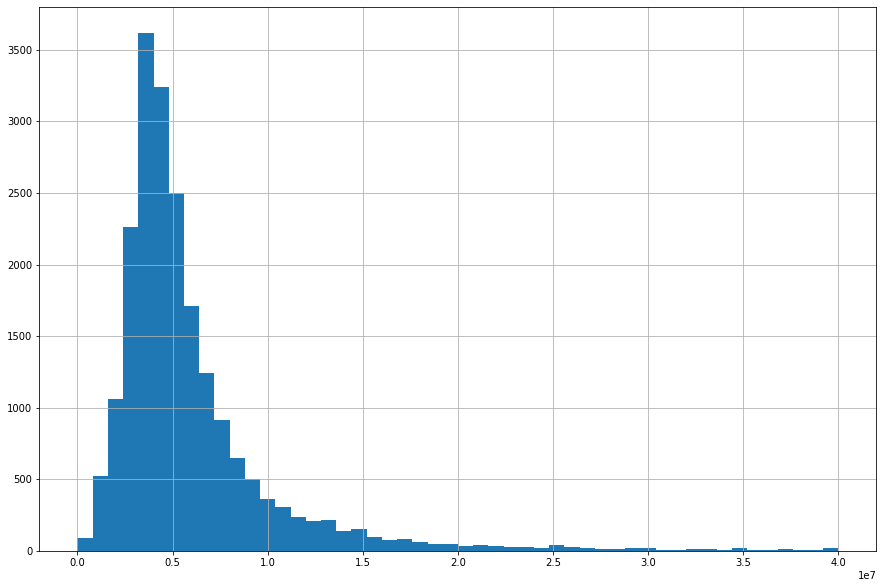

In [133]:
data_hom['last_price'].hist(bins=50,range=(0,40000000), figsize = (15,10))
plt.show()

Задание: Изучить параметр площадь, построить гистограмму. Импортируем библиотеку Python 'Matplotlib' для построения графиков. Для начала выведем функция describe(), для того чтобы увидеть общую картину по столбцу 'last_price'. После этого, учитывая минимальное и максимальное значение, строим гистограмму. Дальше 40 млн расположен маленький пласт значений, поэтому берем все, что находится перед ним.
Исходя из полученной гистограммы можно сказать, что самые продаваемые квартиры в районе 3.5 млн-4.5 млн руб. 

In [134]:
data_hom['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6, 11,  7,  8, 14, 10, 15,  9, 19, 16, 12])

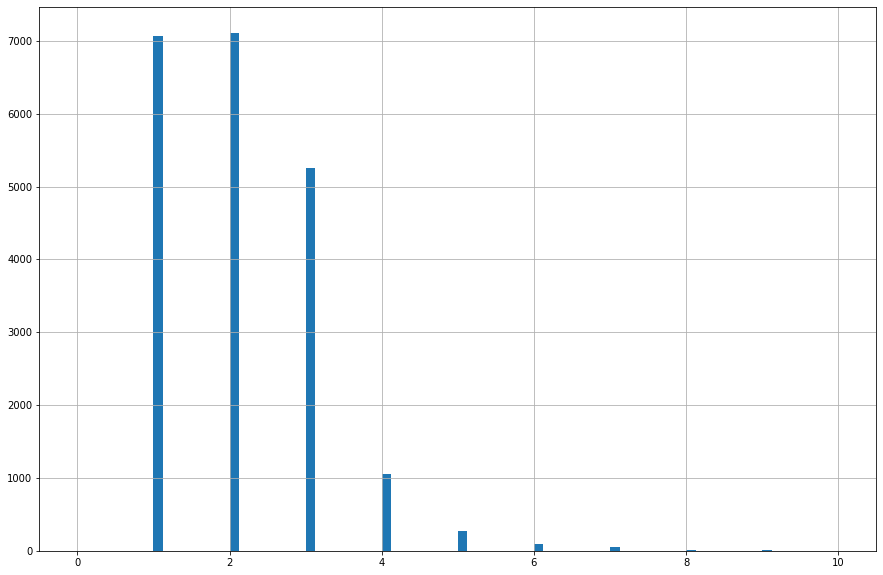

In [135]:
data_hom['rooms'].hist(bins=80,range=(0,10), figsize = (15,10))
plt.show()

Задание: Изучить параметр количество комнат, построить гистограмму. Посмотрим, какие вообще есть значения в столбце 'rooms'. 
Больше 8  комнат встречается крайне редко, построим гистограмму с ранжировкой до 10 комнат
Из полученных результатов видим, что самые продаваемые - одно- и двухкомнатные квартиры, чуть меньше процент у трехкомнатных квартир 

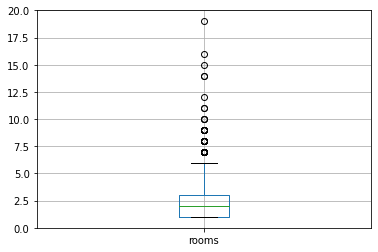

In [136]:
plt.ylim(0,20)
data_hom.boxplot(column='rooms') 
plt.show()

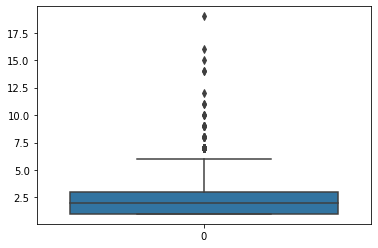

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=data_hom['rooms'])

In [138]:
len(data_hom.query('rooms >= 8'))

27

In [139]:
(len(data_hom.query('rooms >= 8')) / len(data_hom))*100

0.12892135797163728

In [140]:
data_hom_rooms = data_hom.query('rooms <= 8')

С помощью метода Боксплот из прочитанной статьи построил два графика для столбца "rooms". Согласно "верхним усам" квартиры, где есть более 7 комнат, встречаются крайне редко. Я решил "отрезать" все квартиры, в которых более 8 комнат, их процент очень мал на фоне всех данных(менее 1%)

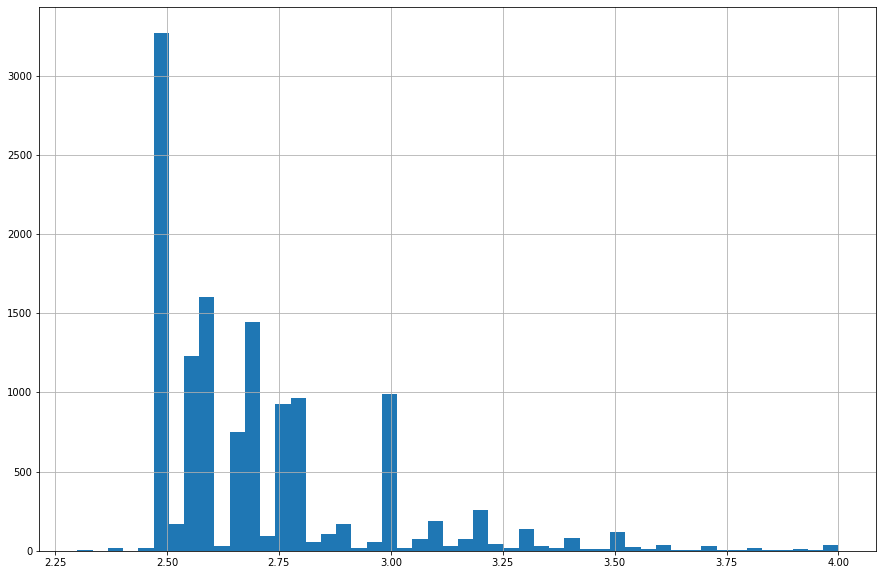

In [141]:
data_hom_rooms['ceiling_height'].hist(bins=50,range=(2.3,4), figsize = (15,10))
plt.show()

Задание: изучить параметр высота потолка. Здесь сложилась двоякая ситуация. Ранее мы заполнили столбец 'ceiling_height' средними значениями группируя по столбцу "floor". Сейчас мы видим, что 2.6 м является самым массовым значением(влияние среденего значения). Если мы закомментируем функции выше 

(data_hom['ceiling_height'] = data_hom['ceiling_height'].fillna(height_hom)
data_hom['ceiling_height']= data_hom['ceiling_height'].fillna(data_hom['ceiling_height'].mean())) и оставим пропуски без изменений, то самые "высокие" результаты будут 2.4 - 2.5 м

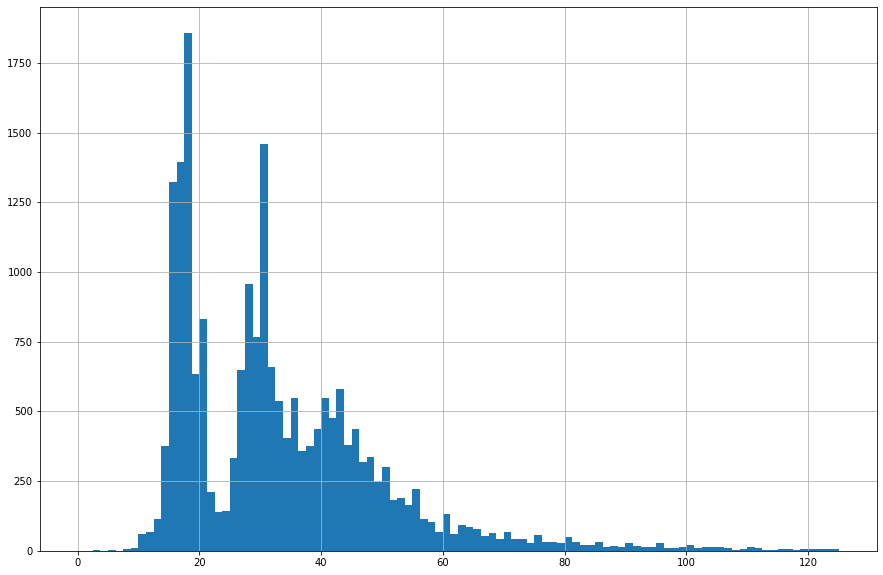

In [142]:
data_hom_rooms['living_area'].hist(bins=100,range=(0,125), figsize = (15,10))
plt.show()

Задание: изучить параметр общая площадь. Больше всего квартир с площадью от 17 до 19 м2

In [143]:
data_hom_rooms['days_exposition'].describe()

count    20925.000000
mean       173.892043
std        207.911239
min          1.000000
25%         48.000000
50%        102.000000
75%        205.000000
max       1580.000000
Name: days_exposition, dtype: float64

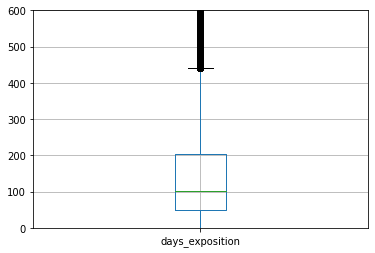

In [144]:
plt.ylim(0,600)
data_hom_rooms.boxplot(column='days_exposition') 
plt.show()

Задание: Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану.Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

Для начала вызовем describe() для столбца 'days_exposition' и  построим диаграмму размаха. Мы видим, что среднее значение почти в два раза больше медианы. Это значит, что есть "длинный" хвост больших значений, влияющий на среднее значение.
Исследуя диаграмму размаха можно увидеть, что среднее время продажи квартиры около 100 дней. Часть значений лежит за диапазоном 440 дней(это 1.5 межквартильный размах, добавленный к 3-му квартилю. Это ориентировочная граница нормального размаха. Всё, что лежит за ней, считается выбросом).Эти данные продажи выглядят правдоподобными.
Самыми быстрыми продажами можно назвать продажу в один день, что подозрительно быстро.
Долгие продажи можно объяснить тем, что люди могли забыть убрать объявление вовремя после продажи квартиры, либо непривлекательностью некоторых предложений.

In [145]:
len(data_hom_rooms.query('days_exposition > 440'))

2005

2010 предложений выходят за 440 дней, уберем их из таблицы, создав срез query('days_exposition < 440')

In [146]:
good_data_hom = data_hom_rooms.query('days_exposition < 440')

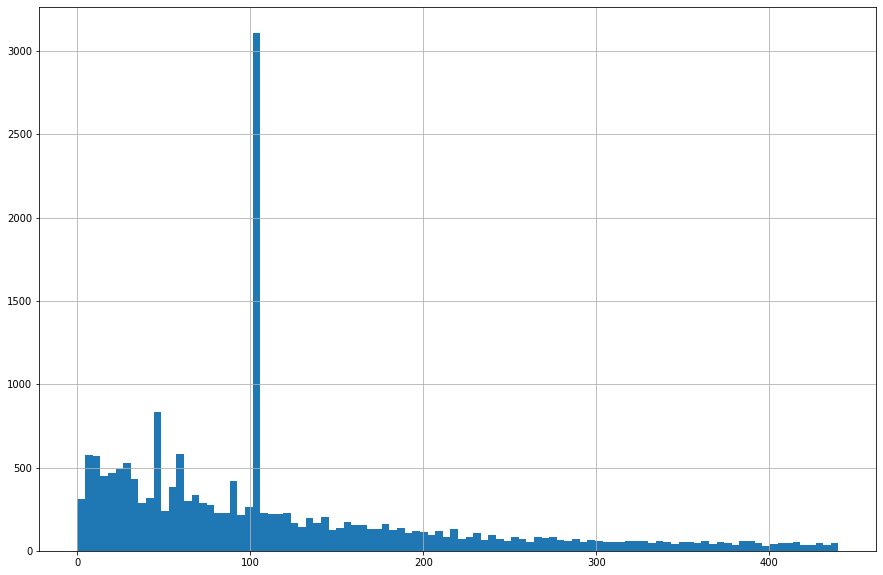

In [147]:
good_data_hom['days_exposition'].hist(bins=100,range=(0,440), figsize = (15,10))
plt.show()

Не совсем точно можно определить, уменьшим ранжировку от 40 дней до 120

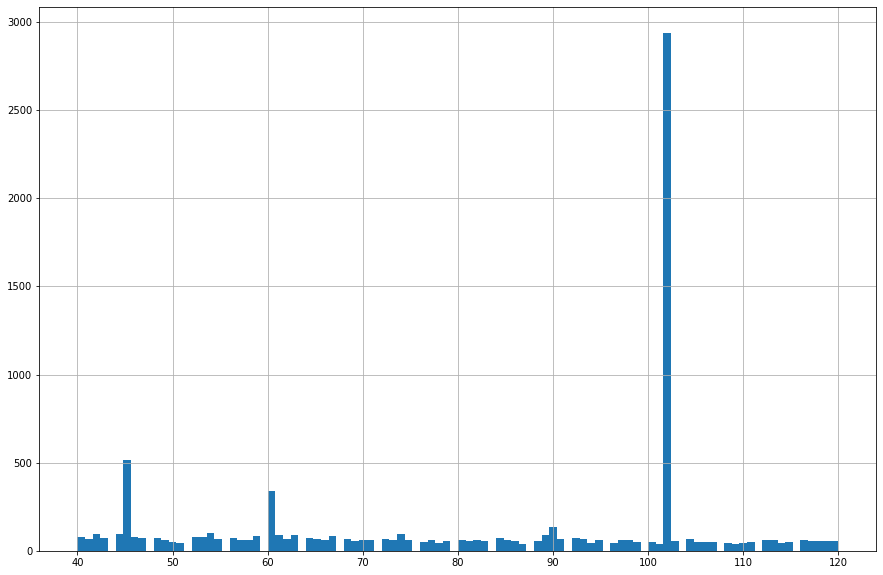

In [148]:
good_data_hom['days_exposition'].hist(bins=100,range=(40,120), figsize = (15,10))
plt.show()

Убрав все редкие и выбивающиеся значения, мы определили что максимальное количество продаж приходилось на 103 дня, что в целом соотвествует медиане.

Заново просмотрел параметры, для которых надо удалить выбросы. Решил все-таки убрать выбросы в графе "days_exposition", т.к., на мой взгляд, все что "весит" более 450 дней, уже является подозрительным (возможно сам продавец уже и забыл об объявлении). Ознакомился со статьями о продаже недвижимости в Яндексе, там указано, что в целом квартиры продаются за полгода - год.
Для параметров "rooms" и "last_price" также, с помощью Boxplot, рассмотрел верхние границы и удалил выбросы.

In [149]:
good_data_hom['last_price'].describe()

count    1.891100e+04
mean     6.310277e+06
std      8.804894e+06
min      1.219000e+04
25%      3.500000e+06
50%      4.650000e+06
75%      6.696500e+06
max      4.013000e+08
Name: last_price, dtype: float64

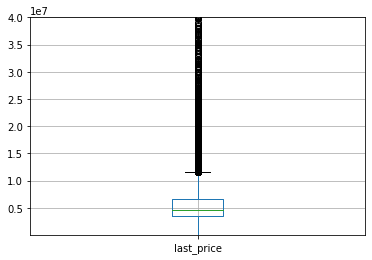

In [150]:
plt.ylim(10000,40000000)
good_data_hom.boxplot(column='last_price')
plt.show()

Задание: факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади.
Для начала вызовем describe() для столбца 'last_price' и  построим диаграмму размаха. Среднее опять больше медианы почти на 2 млн рублей.У нас уже есть информация из предыдущих заданий, что самые продаваемые квартиры в районе 3.5 млн-4.5 млн руб.Дальше 12 млн идут выбивающиеся значения.


In [151]:
good_data_hom.query('last_price>15000000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_nearest_km,which_floor,d_year,d_month,d_weekday,price_m2,l_t_area,k_t_area,cost_km
63,2,20000000,118.0,2018-09-11,3,3.00,9,68.0,7,False,False,False,16.0,0,Санкт-Петербург,26055,4800,1,648,1,779,37,4,другой,2018,9,1,2.941176e+05,0.576271,0.135593,5.000000e+06
121,20,33000000,180.0,2017-02-17,3,2.90,9,86.0,8,False,False,False,24.0,4,Санкт-Петербург,25689,4264,1,633,0,-1,144,4,другой,2017,2,4,3.837209e+05,0.477778,0.133333,8.250000e+06
140,8,16912000,105.7,2016-12-09,2,2.70,3,48.4,1,False,False,False,15.4,0,Пушкин,14352,26506,3,366,3,179,390,26,первый,2016,12,4,3.494215e+05,0.457900,0.145695,6.504615e+05
147,10,27700000,179.6,2017-07-06,5,2.85,25,97.2,25,False,False,False,33.8,2,Санкт-Петербург,19424,4489,0,-1,1,806,75,4,последний,2017,7,3,2.849794e+05,0.541203,0.188196,6.925000e+06
233,17,19800000,118.0,2017-12-15,3,2.80,25,62.0,3,False,False,False,21.5,0,Санкт-Петербург,36827,12348,1,485,1,474,102,12,другой,2017,12,4,3.193548e+05,0.525424,0.182203,1.650000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23549,5,19600000,184.0,2016-04-21,3,3.00,19,55.7,19,False,False,False,24.5,5,Санкт-Петербург,18995,4837,0,-1,0,-1,205,4,последний,2016,4,3,3.518851e+05,0.302717,0.133152,4.900000e+06
23555,5,15350000,158.5,2019-03-07,7,2.95,7,57.4,7,False,False,False,12.4,1,Санкт-Петербург,23546,3088,1,347,0,-1,102,3,последний,2019,3,3,2.674216e+05,0.362145,0.078233,5.116667e+06
23574,14,64990000,139.0,2015-11-24,3,3.00,8,3.0,8,False,False,False,16.0,1,Санкт-Петербург,33255,5975,1,630,3,100,280,5,последний,2015,11,1,2.166333e+07,0.021583,0.115108,1.299800e+07
23590,0,21187872,123.3,2017-04-25,3,NaN,9,50.4,18,False,False,False,23.6,0,Санкт-Петербург,19095,4529,0,-1,0,-1,104,4,другой,2017,4,1,4.203943e+05,0.408759,0.191403,5.296968e+06


In [152]:
good_data_hom.query('last_price<1000000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_nearest_km,which_floor,d_year,d_month,d_weekday,price_m2,l_t_area,k_t_area,cost_km
259,6,900000,30.0,2017-11-21,1,2.5,5,15.0,4,False,False,False,5.0,1,Ивангород,-1,14229,0,-1,0,-1,102,14,другой,2017,11,1,60000.000000,0.500000,0.166667,64285.714286
268,7,650000,46.0,2018-03-15,2,2.5,5,30.0,5,False,False,False,7.0,0,Сланцы,-1,14229,0,-1,0,-1,75,14,последний,2018,3,3,21666.666667,0.652174,0.152174,46428.571429
293,2,900000,42.8,2017-06-14,2,NaN,5,32.0,5,False,False,False,5.0,0,Сясьстрой,-1,14229,0,-1,0,-1,247,14,последний,2017,6,2,28125.000000,0.747664,0.116822,64285.714286
606,5,790000,38.6,2018-04-03,2,3.0,2,24.0,1,False,False,False,6.0,0,поселок городского типа Синявино,-1,14229,0,-1,0,-1,374,14,первый,2018,4,1,32916.666667,0.621762,0.155440,56428.571429
638,6,980000,47.1,2019-04-12,2,NaN,3,29.0,3,False,False,False,9.0,0,Бокситогорск,-1,14229,0,-1,0,-1,102,14,последний,2019,4,4,33793.103448,0.615711,0.191083,70000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23067,8,600000,31.8,2019-04-24,1,NaN,2,20.0,1,False,False,False,7.0,0,деревня Коркино,-1,14229,0,-1,0,-1,102,14,первый,2019,4,2,30000.000000,0.628931,0.220126,42857.142857
23153,9,650000,41.0,2017-10-13,2,NaN,3,28.0,1,False,False,False,6.0,0,Бокситогорск,-1,14229,0,-1,0,-1,14,14,первый,2017,10,4,23214.285714,0.682927,0.146341,46428.571429
23354,18,900000,42.6,2018-02-26,2,NaN,2,28.0,1,False,False,False,9.0,0,деревня Тихковицы,-1,14229,0,-1,0,-1,219,14,первый,2018,2,0,32142.857143,0.657277,0.211268,64285.714286
23484,11,470000,44.5,2018-07-02,2,NaN,2,28.0,2,False,False,False,7.5,0,Сланцы,-1,14229,0,-1,0,-1,298,14,последний,2018,7,0,16785.714286,0.629213,0.168539,33571.428571


Проверим сколько значений можно взять. Минимальную цену установлю 1 млн руб, т.к. исследуя рынок, недвижимость, которая продается дешевле вызывает подозрение. "Верхнюю планку" возьмем в 15 млн руб(на диаграмме размаха было 12 млн, но возьмем с запасом).

In [153]:
good_data_homa = good_data_hom.query('1000000<last_price<15000000')

Создаем срез, в который войдут квартиры дороже 1 млн руб. и дешевле 15 млн руб, в дальнейших исследованиях будем отталкиваться от нее. Выведем новую переменную для среза 'good_data_homa'.

In [154]:
print ("Доля корреляции составляет: {:.1}".format(good_data_homa['total_area'].corr(good_data_homa['last_price'])))

Доля корреляции составляет: 0.7


Используя функцию corr(), между 'total_area' и 'last_price' мы видим, что корреляция положительная и показатели достаточно высокие. Из этого можно сделать вывод что при увеличении площади квартиры увеличивается и ее стоимость. То же самое мы видим и на графике ниже.

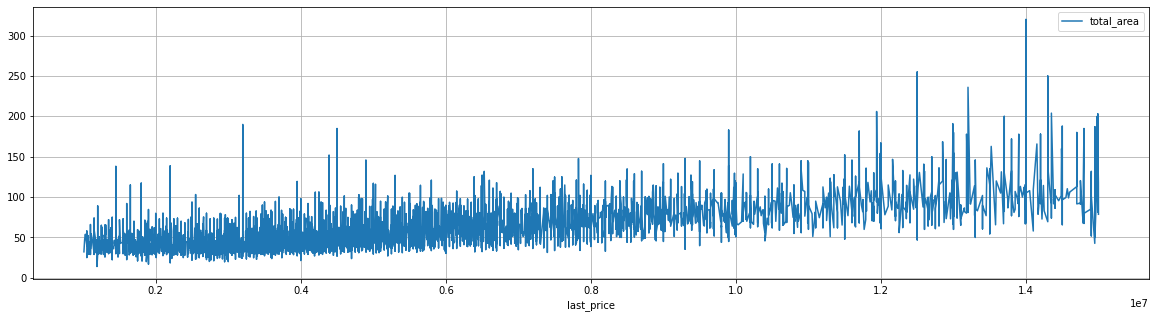

In [155]:
good_data_homa.sort_values(by='last_price',ascending=True).plot(x='last_price',y='total_area',grid=True, style='-',figsize=(20,5), alpha=1)
plt.show()

In [157]:
print ("Доля корреляции составляет: {:.1}".format(good_data_homa['cityCenters_nearest_km'].corr(good_data_homa['last_price'])))

Доля корреляции составляет: -0.3


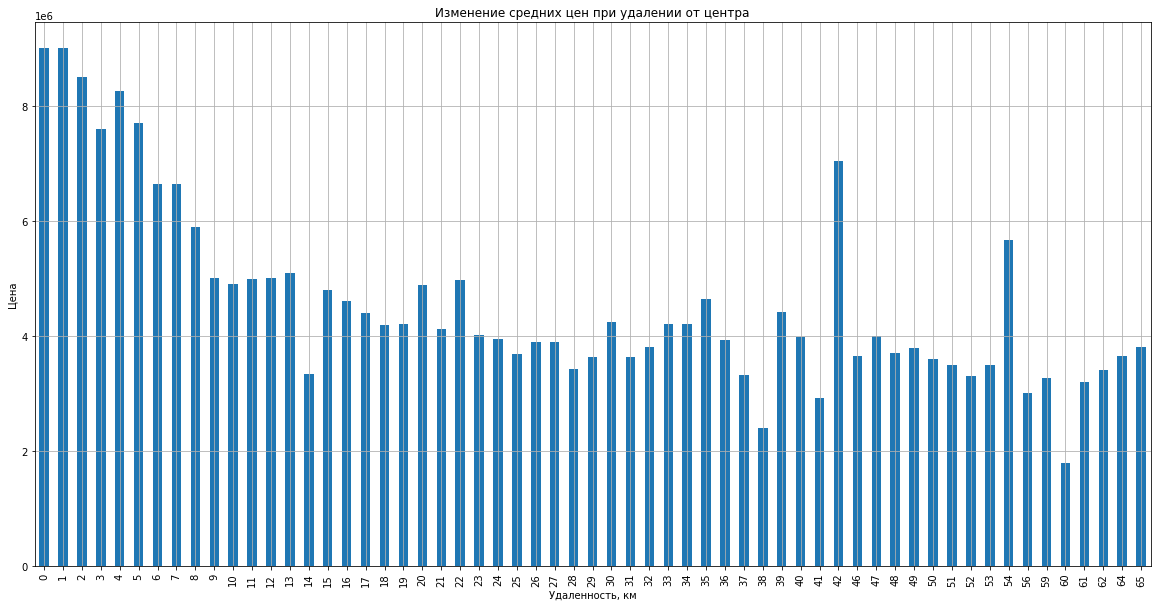

In [158]:
last_price_km = good_data_homa.groupby('cityCenters_nearest_km')['last_price'].median()
last_price_km.plot(kind = 'bar',figsize = (20,10), title = 'Изменение средних цен при удалении от центра', grid = True)
plt.xlabel('Удаленность, км')
plt.ylabel('Цена')
plt.show()

Задание: факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от удалённости от центра
По графику достаточно трудно сказать, есть ли зависимость между расстоянием и стоимостью. После 60 км стоимость начинает падать. Однако по всему графику мы видим, что есть масса выбивающихся значений. Корреляция тоже не дала четкий ответ на вопрос, что есть обратная зависимость между столбцами 'cityCenters_nearest_km' и 'last_price'

In [159]:
print ("Доля корреляции составляет: {:.1}".format(good_data_homa['rooms'].corr(good_data_homa['last_price'])))

Доля корреляции составляет: 0.5


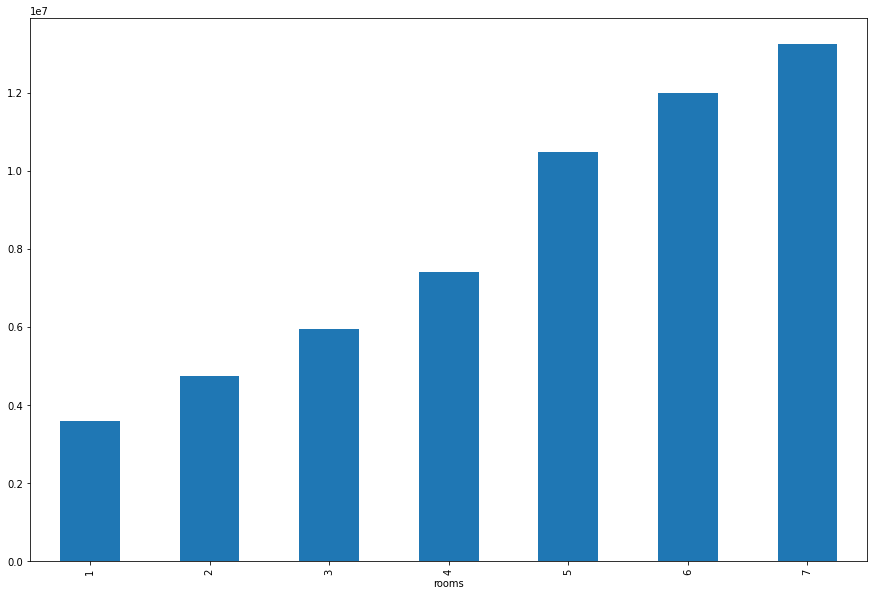

In [160]:
good_data_homa.groupby('rooms')['last_price'].median().plot(x='rooms',y='last_price',kind='bar', figsize = (15,10))
plt.show()

Задание: факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от количества комнат. 
В первую очередь, сгруппируем количество комнат по цене, из этого выведем медиану, на основании этого построим график зависимости между 'rooms' и 'last_price'
Уровень корреляция составляет 0.5 и на графике мы видим прямую зависимость: больше комнат - больше стоимость.

In [161]:
good_data_homa[['last_price','total_area','cityCenters_nearest','rooms']].corr()

,last_price,total_area,cityCenters_nearest,rooms
last_price,1.000000,0.742576,-0.294659,0.490518
total_area,0.742576,1.000000,-0.153733,0.797118
cityCenters_nearest,-0.294659,-0.153733,1.000000,-0.105573
rooms,0.490518,0.797118,-0.105573,1.000000


Создал матрицу корреляции  дя трех параметров: кол-во комнат, дальность от центра, общая площадь.

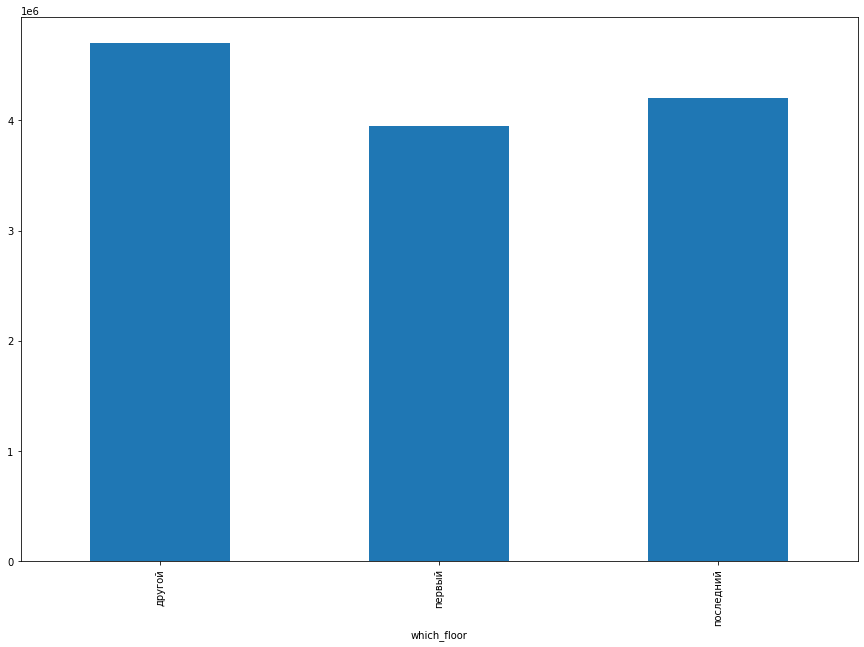

In [162]:
good_data_homa.groupby('which_floor')['last_price'].median().plot(x='which_floor',y='last_price',kind='bar', figsize = (15,10))
plt.show()

In [163]:
print ("Доля корреляции составляет: {:.1}".format(good_data_homa['floor'].corr(good_data_homa['last_price'])))

Доля корреляции составляет: 0.1


Задание: факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от этажа.
Сгруппируем на каком этаже находятся квартиры по стоимости, выведем медиану. Корреляция крайне "слабая" и на графике нет особого понимания. Цена не зависит от того, на каком этаже расположена квартира

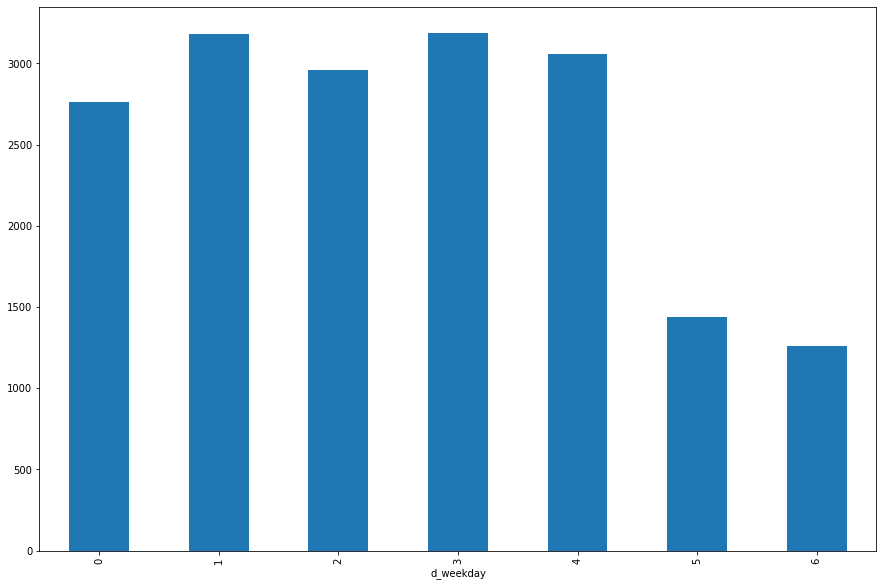

In [164]:
good_data_homa.groupby('d_weekday')['last_price'].count().plot(x='d_weekday',y='last_price',kind='bar', figsize = (15,10))
plt.show()

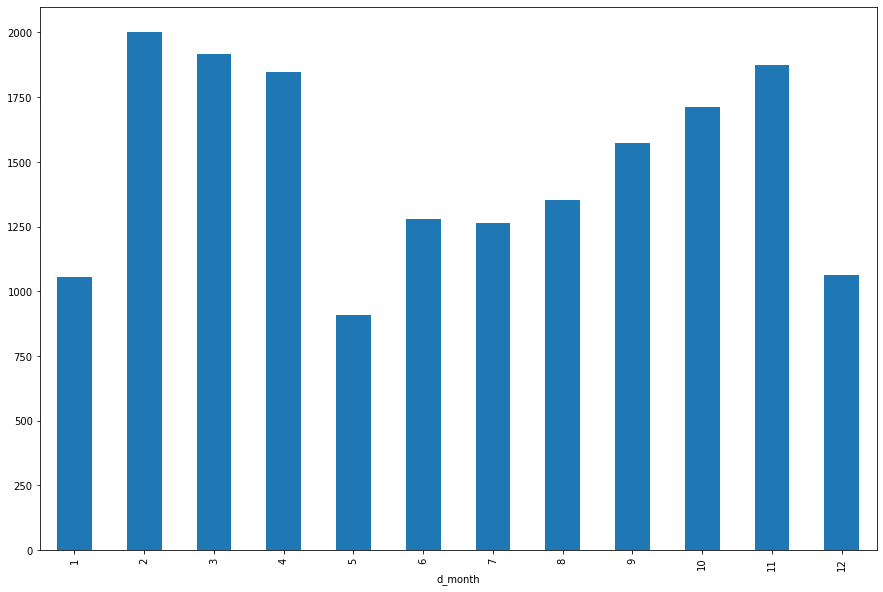

In [165]:
good_data_homa.groupby('d_month')['last_price'].count().plot(x='d_month',y='last_price', kind='bar', figsize = (15,10))
plt.show()


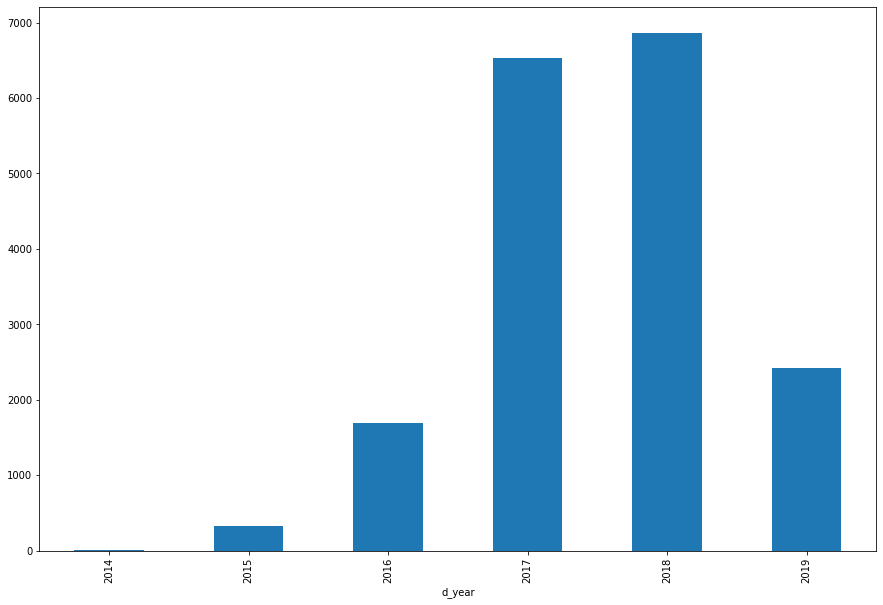

In [166]:
good_data_homa.groupby('d_year')['last_price'].count().plot(x='d_year',y='last_price',kind='bar', figsize = (15,10))
plt.show()

Задание: изучить зависимость от даты размещения: дня недели, месяца и года.
Для этого мы построим 3 графика для каждого из параметров. 

а) Продажи чаще всего происходят в будние дни, пик приходится на вторник и четверг. В выходные объявлений очень мало(нерабочие дни, отсутствуют банковские сессии и т.д)
б) Объявления чаще всего публиковались в феврале и в ноябре, меньше всего в мае, декабре и январе. Возможно это связано с продолжительными праздниками в эти месяца.
в) До 2017 года было крайне мало объявлений (возможно кризис, мало людей пользовались размещением объявлений в интернете), пик объявлений пришелся на 2018 год, после этого снова пошел спад.

In [167]:
top_hom = good_data_homa.pivot_table(index='locality_name',values='price_m2',aggfunc=('count','median')).sort_values(by=['median', 'count'],ascending=[False, False])
top_hom.sort_values(by = 'median',ascending = False).head(10)

,count,median
locality_name,,
садовое товарищество Новая Ропша,1,250000.000000
Кудрово,147,203965.517241
поселок Парголово,268,202222.222222
деревня Кудрово,197,197183.098592
деревня Мистолово,8,194767.649687
Мурино,29,189473.684211
Санкт-Петербург,11807,185000.000000
поселок Новогорелово,5,184162.062615
Сестрорецк,142,180450.088006


Задание: Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья.
Создадим переменную top_hom, в которую при помощи функции "pivot_table()" внесем значения цены за квадратный метр в каждом населенном пункте, выведем сумму объявлений, среднее значение и медиану. Выведем первые 10 строк, по убыванию.
Мы видим, что больше всего объявлений в Петере, но самый "дорогой квадратный метр" находится в поселке Парголово. 

<hr style="border: 2px solid yellow;" />
    <h2> Пример кода от ревьюера: <a class="tocSkip"></h2>

In [168]:
names = good_data_homa['locality_name'].value_counts().sort_values(ascending=False).head(10)

In [169]:
data_by_location = good_data_homa.query('locality_name in @names.index').pivot_table(index='locality_name',
                                     values='price_m2',
                                     aggfunc=['count', 'median'])
data_by_location.columns = ['count', 'median']
data_by_location.sort_values(by=['count', 'median'], ascending=False).head(10).sort_values(by='count', ascending=False)

,count,median
locality_name,,
Санкт-Петербург,11807,185000.000000
поселок Мурино,396,180000.000000
поселок Шушары,364,145572.916667
Всеволожск,316,125239.949693
Колпино,299,125418.060201
Пушкин,289,177595.628415
поселок Парголово,268,202222.222222
Гатчина,260,116485.507246
деревня Кудрово,197,197183.098592


<hr style="border: 2px solid yellow;" />

In [170]:
good_data_homa.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_nearest_km,which_floor,d_year,d_month,d_weekday,price_m2,l_t_area,k_t_area,cost_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863,16028,1,482,2,755,102,16,другой,2019,3,3,254901.960784,0.472222,0.231481,8.125000e+05
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817,18603,0,-1,0,-1,81,18,первый,2018,12,1,180107.526882,0.460396,0.272277,1.861111e+05
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856,8098,2,112,1,48,121,8,другой,2018,6,1,312500.000000,0.320000,0.410000,1.250000e+06
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,False,False,False,9.10,0,городской поселок Янино-1,-1,14229,0,-1,0,-1,55,14,другой,2018,9,0,200694.444444,0.473684,0.299342,2.064286e+05
6,6,3700000,37.30,2017-11-02,1,NaN,26,10.60,6,False,False,False,14.40,1,поселок Парголово,52996,19143,0,-1,0,-1,155,19,другой,2017,11,3,349056.603774,0.284182,0.386059,1.947368e+05
8,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,False,False,False,8.81,0,поселок Мурино,-1,14229,0,-1,0,-1,189,14,другой,2018,5,2,187945.560596,0.465320,0.265682,2.071429e+05
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898,15008,0,-1,0,-1,289,15,другой,2017,2,6,123853.211009,0.714754,0.106557,3.600000e+05
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,False,False,False,8.50,0,Санкт-Петербург,38357,13878,1,310,2,553,137,13,другой,2017,11,3,248768.472906,0.512626,0.214646,3.884615e+05
11,9,3300000,44.00,2018-08-27,2,NaN,5,31.00,4,False,False,False,6.00,1,Ломоносов,48252,51677,0,-1,0,-1,7,51,другой,2018,8,0,106451.612903,0.704545,0.136364,6.470588e+04
12,10,3890000,54.00,2016-06-30,2,NaN,5,30.00,5,False,False,False,9.00,0,Сертолово,-1,14229,0,-1,0,-1,90,14,последний,2016,6,3,129666.666667,0.555556,0.166667,2.778571e+05


In [171]:
spb=good_data_homa.query('locality_name == "Санкт-Петербург"')

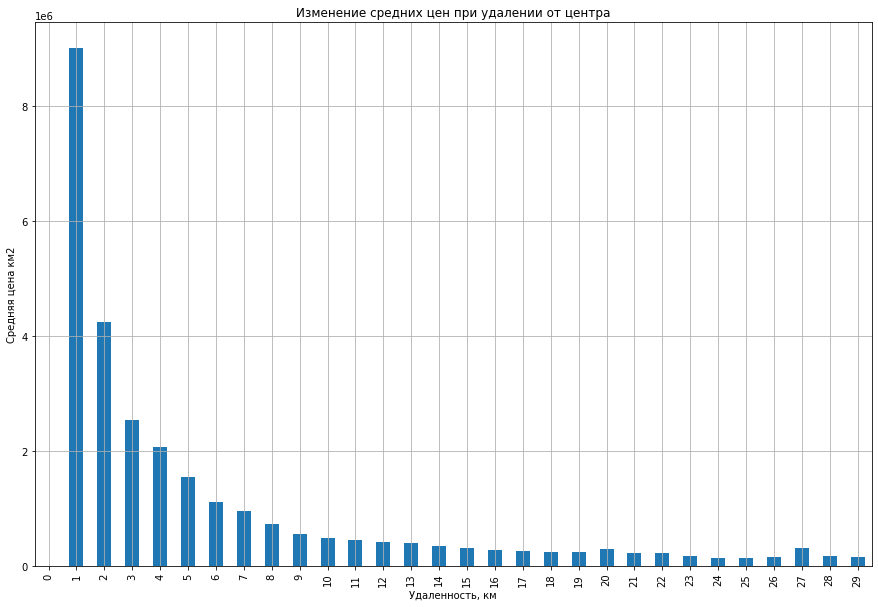

In [172]:
spb_group_km = spb.groupby('cityCenters_nearest_km')['cost_km'].median()
spb_group_km.plot(kind = 'bar',figsize = (15,10), title = 'Изменение средних цен при удалении от центра', grid = True)
plt.xlabel('Удаленность, км')
plt.ylabel('Средняя цена км2')
plt.show()

Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр.
Для начала создадим срез, в котором будут присутствовать строки, где месторасположение - Санкт - Петербург. Создадим переменную: "spb"

<div class="alert alert-block alert-info">
Создал новый график, используя 'cityCenters_nearest_km'. На графике видим, что после 8 км цена почти не меняется. Данная область, согласно условиям задачи, должна входить в центр.

In [173]:
top_spb = spb.query('cityCenters_nearest_km < 8')

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
По твоему графику это не так хорошо видно и понятно, но, скорее, более адекватная цифра для зоны центра - это 7-8 км.
        
Попробуй построить вот такой график:
        
![image.png](attachment:image.png)

<div class="alert alert-success">
<h2> Комментарий ревьюера: вторая итерация ревью <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Теперь зона центра определена корректнее!

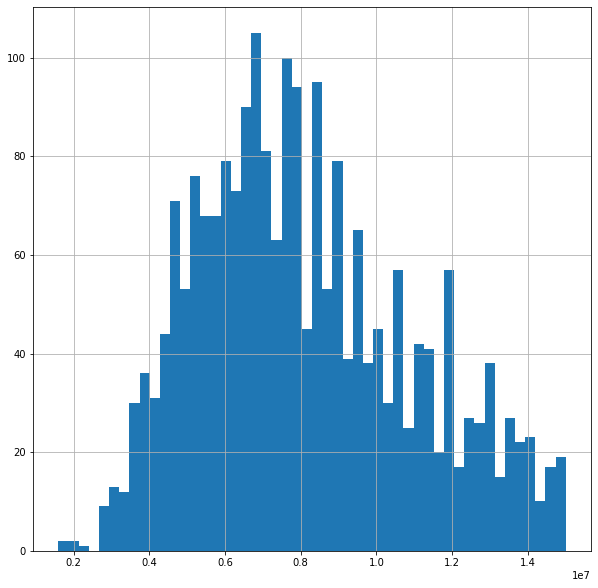

In [174]:
top_spb['last_price'].hist(bins=50, figsize = (10,10))
plt.show()

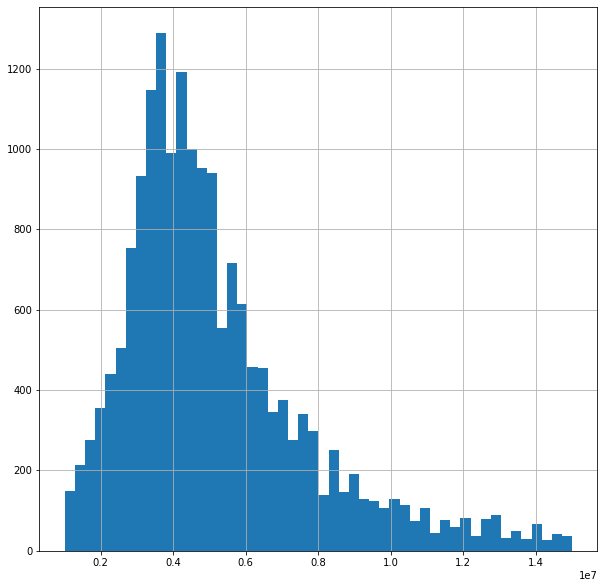

In [175]:
good_data_homa['last_price'].hist(bins=50, figsize = (10,10))
plt.show()

Задание: Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: цена.
Создаем срез из переменной spb, в который войдут все квартиры не дальше 5 километров от центра.
Выводим гистограмму по цене, видим 3 пика: самые продаваемые квартиры стоят около 6.8 млн руб, затем около 7.6 млн руб и около 8.4 млн руб.
(Ниже выводим график по всем населенным пунктам для вывода)

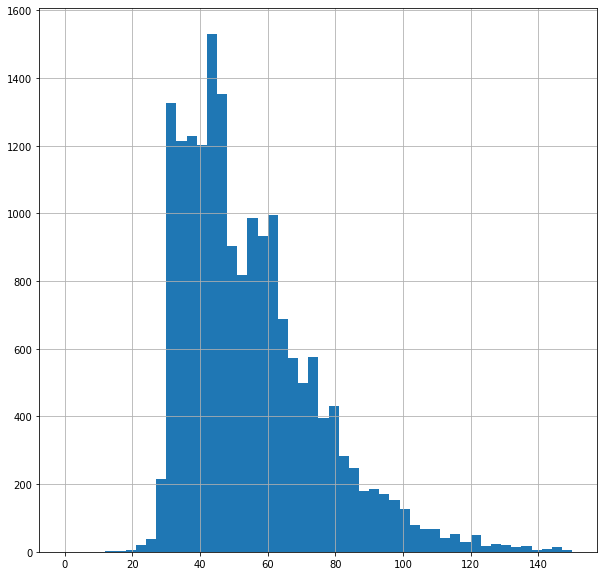

In [176]:
good_data_homa['total_area'].hist(bins=50, range=(0,150), figsize = (10,10))
plt.show()

Задание: Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь.
Площадь самых продаваемых квартир около 60 м2
(Ниже выводим график по всем населенным пунктам для вывода)

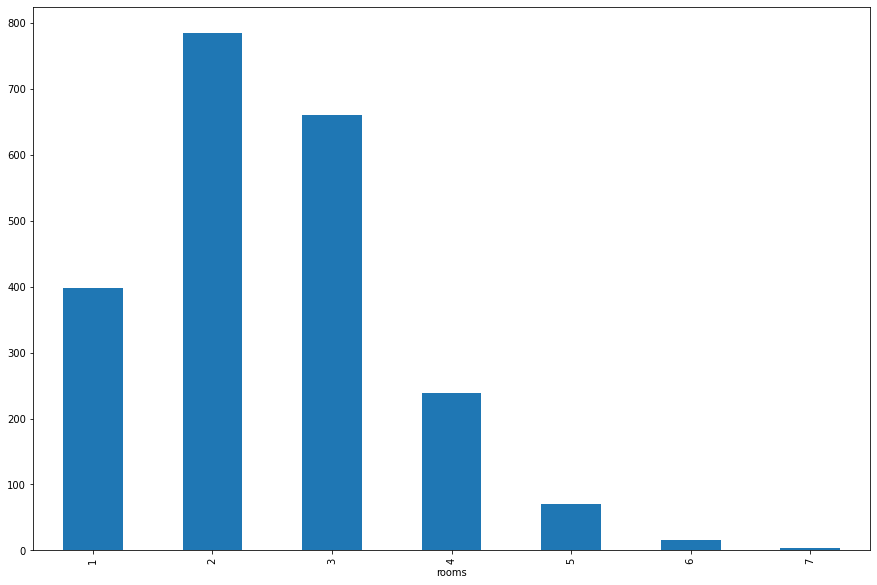

In [177]:
top_spb.groupby('rooms')['rooms'].count().plot(x='rooms', y='count', kind='bar', figsize = (15,10))
plt.show()

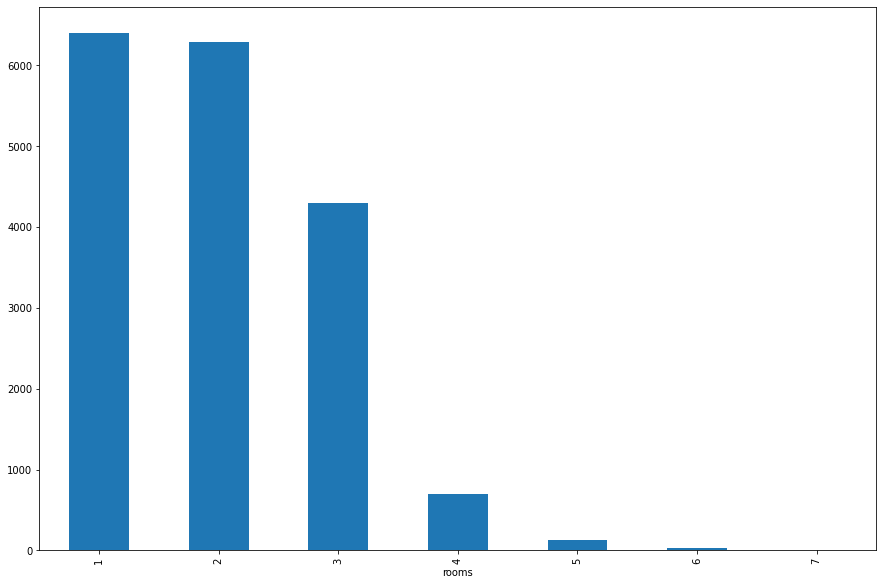

In [178]:
good_data_homa.groupby('rooms')['rooms'].count().plot(x='rooms',y='count',kind='bar', figsize = (15,10))
plt.show()

Задание: Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: количество комнат.
Чаще всего продаются двухкомнатные квартиры, потом идут трехкомнатные.
(Ниже выводим график по всем населенным пунктам для вывода)

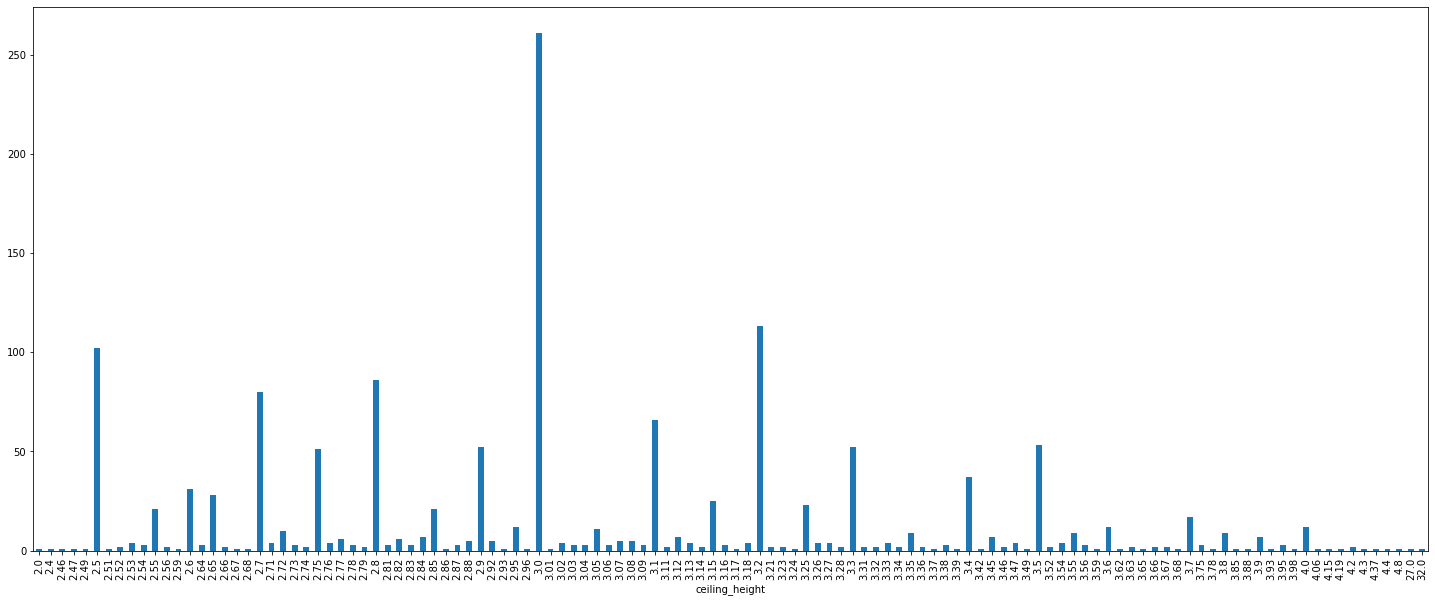

In [179]:
top_spb.groupby('ceiling_height')['ceiling_height'].count().plot(x='ceiling_height', y='count', kind='bar', figsize=(25,10))
plt.show()

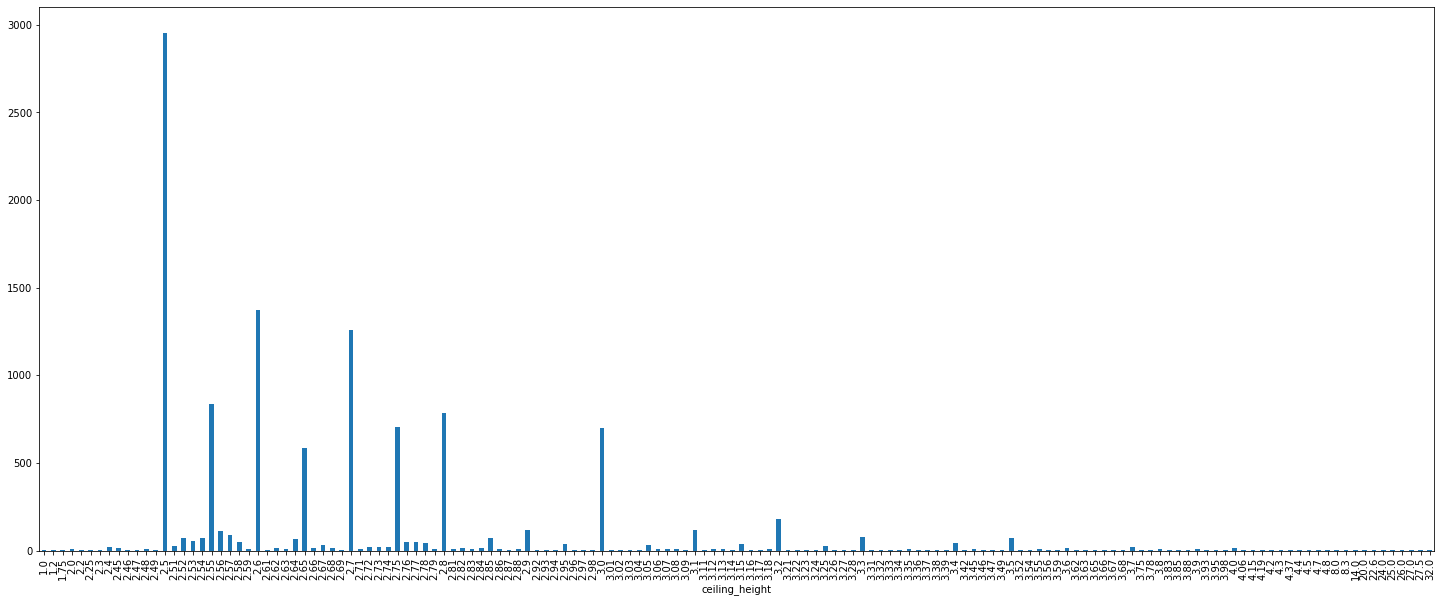

In [180]:
good_data_homa.groupby('ceiling_height')['ceiling_height'].count().plot(x='ceiling_height',y='count',kind='bar',figsize=(25,10))
plt.show()

Задание: Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: высота потолка.
Опять же, если мы ориентируемся на среднее значение, то пик совпадает с общей таблицей: 2.65 м. Если не заполнять пропуски средним - то около 3 метров.
(Ниже выводим график по всем населенным пунктам для вывода)

Построил график, на котором точнее видно, что самая распространенная высота потолков - 2.65 м

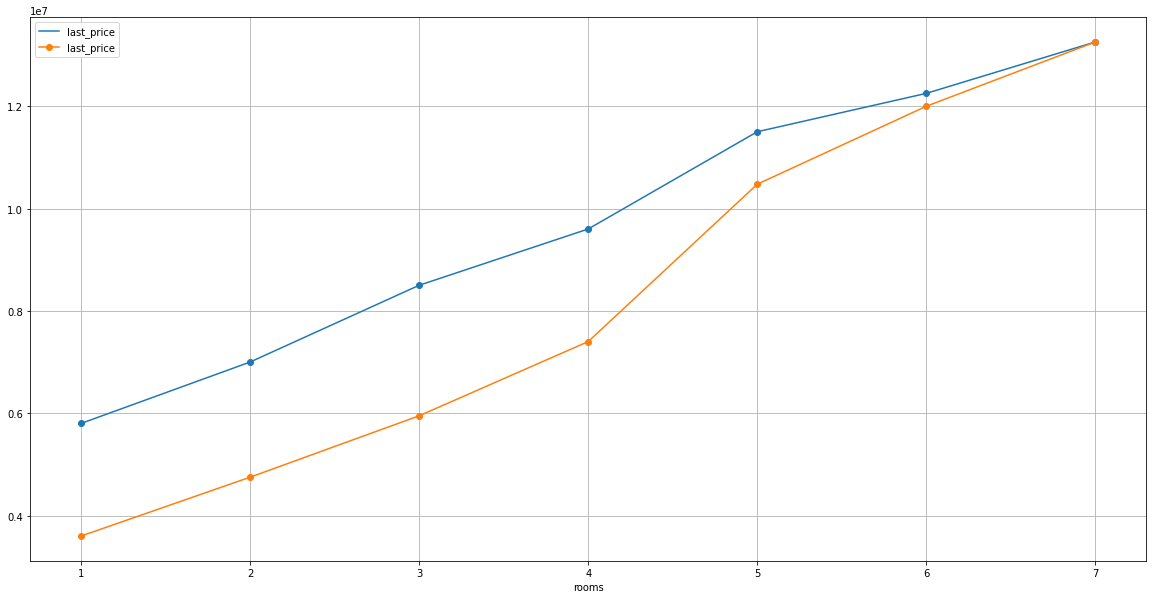

In [181]:
top_spb.groupby('rooms')['last_price'].median().plot(x='rooms',y='last_price',style='o-',grid=True,figsize=(20,10),legend=True)

good_data_homa.groupby('rooms')['last_price'].median().plot(x='rooms',y='last_price',style='o-',grid=True,figsize=(20,10),legend=True)

plt.show()

Выделите факторы, которые влияют на стоимость квартиры: комнаты.
Для сравнения, нам понадобится соединить два графика: top_spb(где данные про центр Санкт - Петербурга) и good_data_homa(где цена от 1 млн до 15 млн руб по всем населенным пунктам)
Группируем оба графика по количеству комнат и цене(выводим медиану), выводим на экран ось x - кол-во комнат, ось y - цена.
Из графиком видим, что в центре Санкт - Петербурга цена как минимум выше на 2 млн руб. Цены совпадают у 6 комнатных квартир для всех населенных пунктов и Петербурга, при увеличении количества комнат цены опять выше в Петербурге.

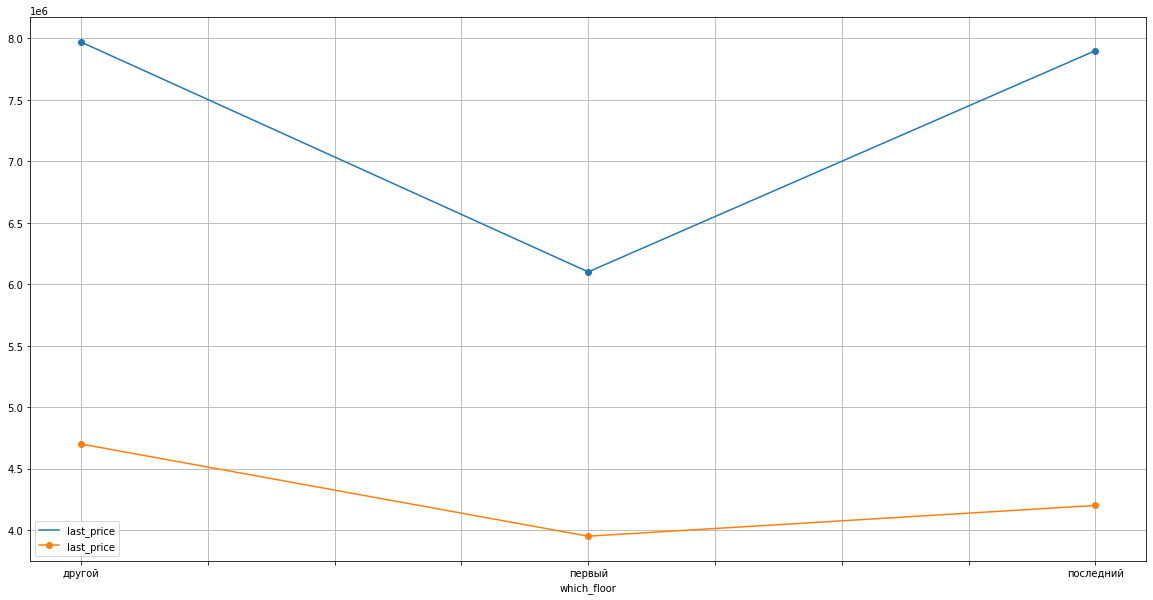

In [182]:
top_spb.groupby('which_floor')['last_price'].median().plot(x='rooms',y='which_floor',style='o-',grid=True,figsize=(20,10),legend=True)

good_data_homa.groupby('which_floor')['last_price'].median().plot(x='which_floor',y='last_price',style='o-',grid=True,figsize=(20,10),legend=True)

plt.show()

Выделите факторы, которые влияют на стоимость квартиры: этаж.
Проделываем такие же действия как в предыдущем пункте. В результате мы видим, что оба графика в целом равны: цены на первый этаж ниже чем на другие этажи(включая последний). По графику видим, что в Петербурге цены по этажам в среднем выше на 2.5 млн руб - 3 млн руб. 


In [183]:
print ("Доля корреляции составляет: {:.1}".format(good_data_homa['cityCenters_nearest_km'].corr(good_data_homa['last_price'])))

Доля корреляции составляет: -0.3


In [184]:
print ("Доля корреляции составляет: {:.1}".format(top_spb['cityCenters_nearest_km'].corr(top_spb['last_price'])))

Доля корреляции составляет: -0.2


Выделите факторы, которые влияют на стоимость квартиры: удалённость от центра. 
Для этого показателя я решил не строить график т.к. выборка очень большая. Вместо этого вывел уровень корреляции для центра Петербурга и (повторно) для всех населенных пунктов.
Для Петербурга ее уровень еще меньше, она отрицательная(чем дальше от центра, тем ниже стоимость), но в целом как и в ситуации с другими населенными пунктами, четкой зависимости нет.

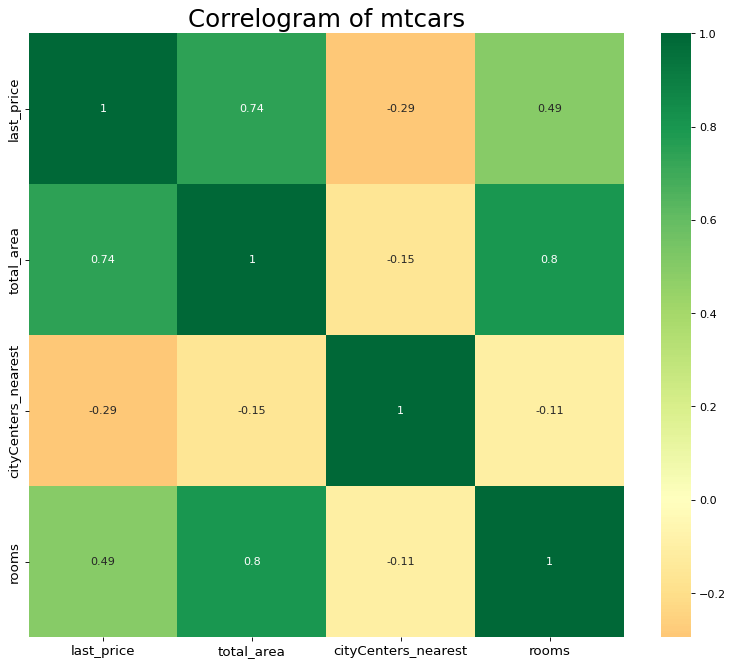

In [185]:

plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(good_data_homa[['last_price','total_area','cityCenters_nearest','rooms']].corr(), xticklabels=good_data_homa[['last_price','total_area','cityCenters_nearest','rooms']].corr().columns, yticklabels=good_data_homa[['last_price','total_area','cityCenters_nearest','rooms']].corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

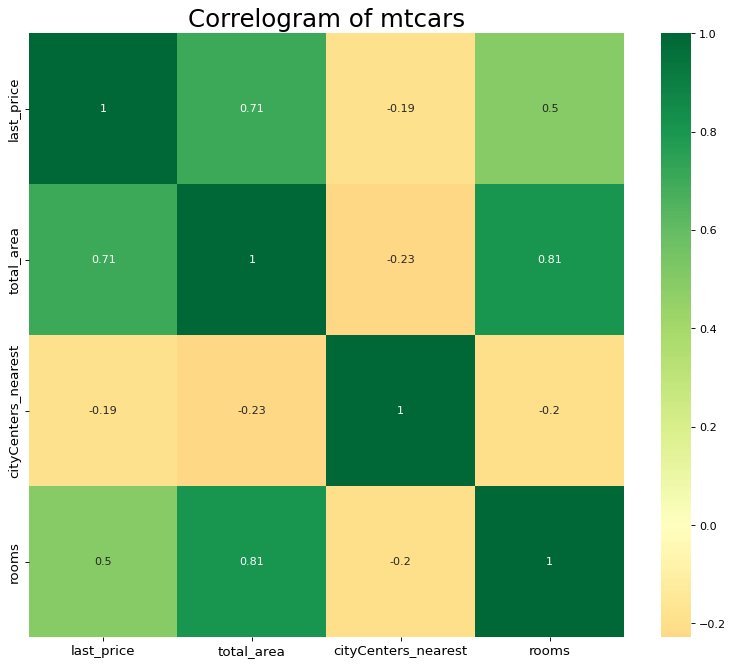

In [186]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(top_spb[['last_price','total_area','cityCenters_nearest','rooms']].corr(), xticklabels=top_spb[['last_price','total_area','cityCenters_nearest','rooms']].corr().columns, yticklabels=top_spb[['last_price','total_area','cityCenters_nearest','rooms']].corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

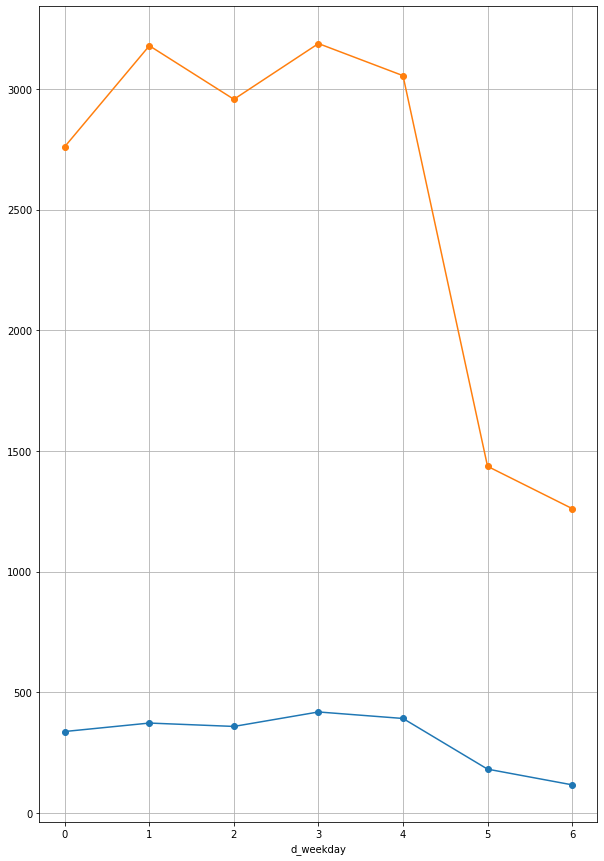

In [187]:
top_spb.groupby('d_weekday')['last_price'].count().plot(x='d_weekday',y='last_price',style='-o',grid=True,figsize=(10,15))

good_data_homa.groupby('d_weekday')['last_price'].count().plot(x='d_weekday',y='last_price',style='-o',grid=True,figsize=(10,15))
plt.show()

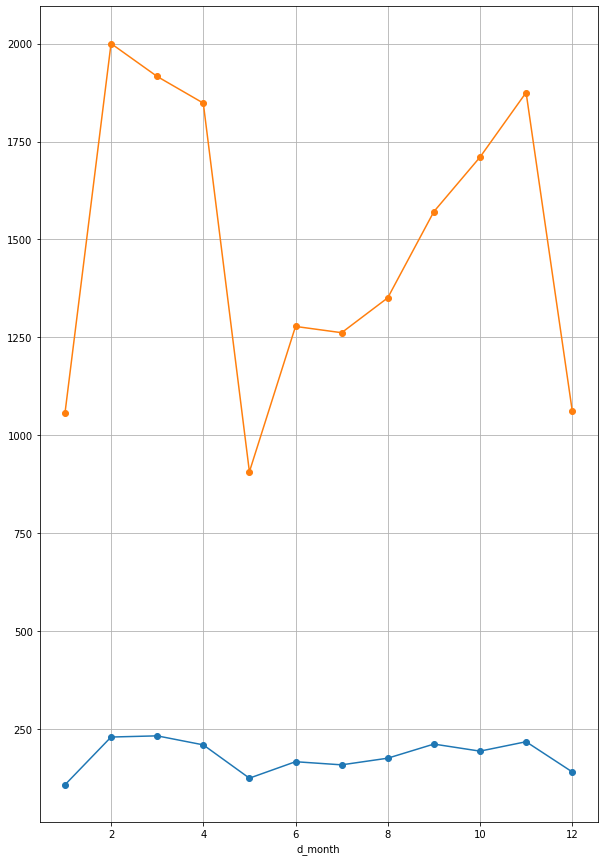

In [188]:
top_spb.groupby('d_month')['last_price'].count().plot(x='d_month',y='last_price',style='-o',grid=True,figsize=(10,15))

good_data_homa.groupby('d_month')['last_price'].count().plot(x='d_month',y='last_price',style='-o',grid=True,figsize=(10,15))
plt.show()

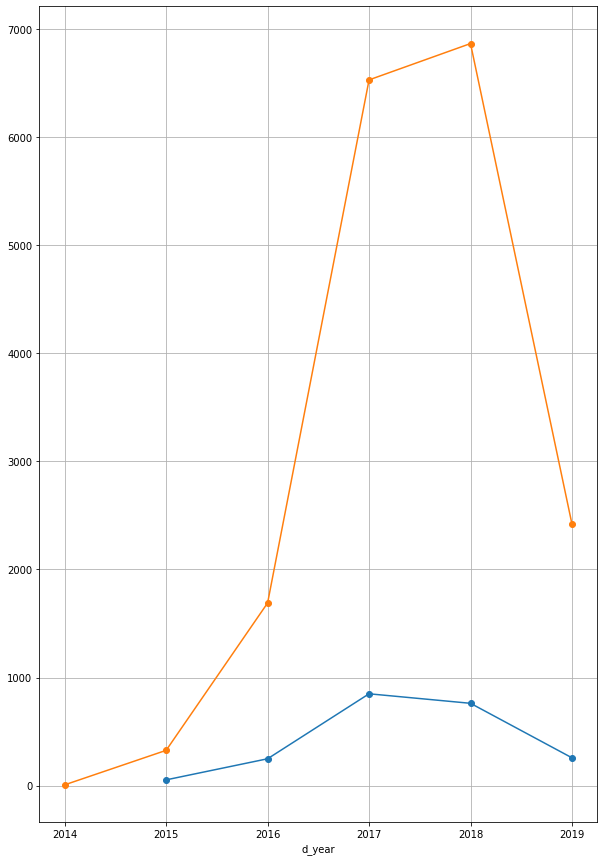

In [189]:
top_spb.groupby('d_year')['last_price'].count().plot(x='d_year',y='last_price',style='-o',grid=True,figsize=(10,15))

good_data_homa.groupby('d_year')['last_price'].count().plot(x='d_year',y='last_price',style='-o',grid=True,figsize=(10,15))
plt.show()

Выделите факторы, которые влияют на стоимость квартиры: дата размещения объявления.
Для этого создадим 3 графика по дню недели, месяцу и году. Группировать здесь будем по количеству объявлений и т.к. в Петербурге их будет гораздо меньше, то figsize укажем (10,15)).Здесь мы будем рассматривать как график с центром Петербурга (синяя линия) выглядит пропорционально графику со всеми населенными пунктами(оранжевая линия).
а) по дням недели ситуация похожа - меньше всего объявлений в выходные, в будние дни в Петербурге количество объявлений почти не различается
б) по месяцам есть некоторые отличия - также меньше всего объявлений в мае и январе(из -за возможных праздников), однако "публикуемым" февралю и ноябрю для всех населенных пунктов, в Петербурге добавился еще и сентябрь.
в) по годам - следует отметить особенность: объявления в центре Петербурга появились почти на год позже чем в остальных территориях. Здесь пик объявлений пришелся немного раньше: на 2017 год, после 2018 г. пошел на спад

Вывод по Петербургу: исходя из полученных результатов, можно заключить что в целом ситуация по квартирам в центре Петербурга совпадает с другими населенными пунктами. Однако есть и свои особенности. Квартире в Петербурге в среднем дороже на 2.5 млн руб - 3 млн руб, что логично для такого города как Петербург. Самые продаваемые квартиры в Петербурге стоят от 6.8 млн руб до 8.4 млн руб, в то же время самые продаваемые квартиры во всех населенных пунктах стоят от 3.8 млн руб до 4.2 млн руб.

Площадь самых продаваемых квартир в центре Петербурга больше примерно на 25% -  около 60 м2, когда в целом этот показатель составляет 45 м2

Ситуация с потолками намного труднее. Если довериться среднему значению, то для Петербурга и остальных населенных пунктов оно одинаковое- 2.6 м. Если не заполнять пропуски средним значением - то в Петербурге около 3 метров, во всех населенных пунктах около 2.4 м.

И в центре Петербурга, и в общем одни из самых продаваемых квартир - двухкомнатные. Однако также пик для всех населенных пунктов приходится на однокомнатные квартиры, в то время как в Петеребурге наравне с двухкомнатными продаются еще и трехкомнатные квартиры.
Учитывая особенность цен в Петербурге (они, как уже было сказано выше) можно сказать, что пропорционально цены на первый этаж ниже чем на другие этажи(включая последний). Дата размещений также существенно не отличается: в выходные никто не размещает, в мае, январе, декабре все отдыхают. Пик размещений для Санкт -Петербурга пришелся на 2017 г., в целом по всем населенным пунктам -  на 2018 г.  



## Общий вывод

В данном проекте перед тем как решать поставленные задачи было необходимо обработать данные. Было очень много пропусков, многие столбцы содержали данные типа float(двойной точности) и их необходимо было перевести в тип int64 для дальнейшего изучения и построения графиков. Для устранения пропущенных значений было использовано ряд методов: удаление строк, замена данных, внесение средних значений по столбцу. Самым трудным оказалось внести значение по столбцу "Высота потолков", т.к. пропущенных значений было много, а средняя слишком сильно влияла на результат. Однако было решено оставить именно среднее значение, т.к. высота не может сильно варьироваться от 2 до 3 метров.
В третьей части были добавлены новые столбцы,в которых отражались ответы на поставленные вопросы. Кроме того, был создан новый столбец - цена за каждый километр.
В четвертом разделе для наглядности были использованы графики, гистограммы, диаграммы размаха. Мы сравнивали различные параметры во всех населенных пунктах, убрали значения, которые сильно выходили за рамки "размаха", рассматривали, как те или иные параметры влияют на цену недвижимости.  
В конце были описаны различия между недвижимостью в центре Петербурга и всеми населеннными пунктами



Подводя итоги работы, следует определить самые важные параметры при выборе квартиры. Основным ориентиром для определения стоимости квартиры - это стоимость квадратного метра. В то же время важно обратить внимание на дату объявлений: Месяцы и дни недели играют важную роль. В целом, необходимо проверять все объявления, с даты размещения которых прошло более полутора лет: возможно данные уже неактуальны. 
Также для обывателя важным параметром выбора квартиры (а для системы - определения цены) стало бы близость недвижимости к инфраструктуре, в рамках Санкт-Петербурга - расстояние до метро. 
Большое влияние на ценообразование также оказывает дальность от центра города, а также количество комнат в самой квартире. 


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод